### BADASS Analysis - can we better tell the difference between mannose, glucose, fructose, maltose and glucosamine with a larger array?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array sugar data

In [3]:
l_sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/Sugars/Large_array_Sugars/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Large_array/Sugars/Large_array_Sugars/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/Sugars/Large_array_Sugars/?y


Small array sugar data

In [4]:
s_sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],  # Using 10 repeats even though 20 are available to match the amount of data available for the larger array
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Large_array/Sugars/Standard_array_Sugars/',
    control_peptides=['GRP35'],
    control_analytes=['a-gal', 'b-gal', 'xyl', 'acetilglu', 'b-glu', 'a-glu', 'gal']
)

Directory Analysis/Large_array/Sugars/Standard_array_Sugars/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/Sugars/Standard_array_Sugars/?y


Locate xlsx files

In [5]:
l_sugar_fluor_data.group_xlsx_repeats()

In [6]:
s_sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [7]:
l_sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/fru_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/gluam_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/mal_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/mal_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_D

In [8]:
s_sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/fru_glu_mal_man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/fru_glu_mal_man_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/Sugars/Reformatted_Sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [9]:
l_sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: mal, 0 (flagged readings = CCHept-I24T: 0.7235089423170673) 


In [10]:
s_sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: fru, 8 (flagged readings = GRP51: 0.2559657433767596, GRP52: 0.13886352824094095, GRP63: 0.4381218433467705, GRP80: 0.3878228183558037, 24D: 0.3185034878351072, 24K: 0.4691637729260335, 17K: 0.5287309623023021) 
 Outlier excluded from final output dataset: glu, 8 (flagged readings = GRP63: 0.4596736313653189, GRP80: 0.391502996366515, 24K: 0.4803523262540226, 17K: 0.4341601362212939) 
 Outlier excluded from final output dataset: mal, 8 (flagged readings = GRP63: 0.2048587299061979, 24K: 0.2651115252872528) 
 Outlier excluded from final output dataset: man, 8 (flagged readings = GRP63: 0.4649162897941823, GRP80: 0.36315648123233224, 24K: 0.44508141412906177) 


In [11]:
l_sugar_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.982028  1.030864     0.929455     0.860856     0.982105  1.024211   
1   1.081686  1.201342     1.044965     1.023090     0.964595  1.000651   
2   1.022970  0.759804     1.006251     0.906501     0.949419  0.971398   
3   1.050763  0.672414     0.995274     0.907771     0.949867  0.947530   
4   1.071890  1.287500     1.026616     1.082397     1.004300  1.005241   
5   0.913383  0.714286     0.886249     0.978496     0.976694  0.853735   
6   0.948889  0.956522     0.914516     0.936120     0.886286  0.800457   
7   1.035721  1.330709     0.918044     0.990085     0.944822  1.053504   
8   0.922048  0.879518     0.917347     0.841628     0.860733  0.935251   
9   0.977739  0.824000     0.959244     0.935677     0.938273  0.932075   
10  1.065949  0.842105     0.929661     0.971606     0.985371  0.940908   
11  1.025125  0.923913     1.093705     0.977410     0.968770  0.835013   
12  0.927596  0.680982     0.902190     1.060440     0.934179  0.987044   
13  0.874801  1.381356     0.832338     0.915149     0.868800  0.972228   
14  1.073218  1.175879     0.781405     1.004598     0.960390  0.979444   
15  0.827491  1.294118     0.875478     0.907203     0.889089  0.971505   
16  0.920649  0.339806     0.945213     0.829368     0.940705  0.923421   
17  0.940694  0.992063     0.896260     0.907366     0.997346  0.862034   
18  1.072328  0.587097     1.038842     1.097082     0.985564  0.999299   
19  1.055340  0.980000     1.027093     1.023074     1.005902  1.012482   
20  0.987514  0.877778     0.986988     1.059325     1.026094  0.989860   
21  1.099456  1.086331     1.057084     1.010606     0.974457  1.007267   
22  0.992739  0.766497     0.979408     0.893519     0.959103  0.946020   
23  0.978663  0.852041     0.896086     0.934067     0.900254  0.916977   
24  0.861934  0.977401     0.922746     0.881683     0.971275  0.921537   
25  1.007643  1.136842     0.984371     0.942875     0.958499  1.023786   
26  1.027008  0.987421     1.022222     0.988206     0.941795  0.899918   
27  0.967471  1.076923     0.875335     0.936435     0.885511  0.950167   
28  0.979685  1.123810     1.014942     0.996560     0.980422  0.901585   
29  1.003561  1.246269     0.901285     0.977691     0.906919  0.946258   
30  1.090924  0.761905     0.941823     0.953420     0.901014  0.980410   
31  0.922291  1.061644     0.874554     0.901049     0.901821  0.895090   
32  0.984411  0.866242     0.964744     0.927832     0.949204  0.918275   
33  0.957130  1.193182     0.848753     0.871554     0.904407  0.958908   
34  1.043279  0.815217     0.897529     0.964326     1.015679  0.870522   
35  0.942686  0.634146     0.958832     0.958229     0.973239  0.831853   
36  0.910304  0.787097     0.946507     0.920822     0.951738  0.967693   
37  1.065355  0.729032     0.979030     0.945389     0.904783  1.050744   
38  0.957442  0.787356     1.021690     0.991537     1.005895  0.918973   
39  1.010585  0.956311     0.985347     0.962564     0.892610  0.928648   
40  0.896438  0.796380     1.001264     0.955277     0.920431  0.908134   
41  0.933532  0.813433     0.917152     1.034626     0.934390  0.790661   
42  1.059771  1.039106     1.041573     1.029624     1.013708  0.962149   
43  1.033166  0.870370     0.951152     1.029202     0.941163  1.064842   
44  1.027387  0.901639     1.009946     0.974328     0.971336  0.995934   
45  0.941257  0.723404     0.887630     0.926377     0.979108  0.907382   
46  1.064028  0.914894     1.061253     0.992939     0.995103  0.987144   
47  1.071873  0.712871     1.063458     0.915420     1.028948  0.874440   
48  0.928307  1.080000     0.917863     0.918256     0.833694  0.960239   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.937164  0.951611     0.927449     1.194995  ...          1.052276   
1   0.978093  1.020903     1.018861     1.025286  ...          0.980620   
2   0.906259  0.967802     1.0

In [12]:
s_sugar_fluor_data.ml_fluor_data

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80      Pent  \
0   0.988141  0.965588  0.988828  0.996260  1.000681  0.989666  1.032666   
1   1.041207  0.941931  1.003861  1.035133  1.005520  0.984476  1.041156   
2   1.066897  1.145133  1.001290  0.991742  1.060211  1.004312  1.040566   
3   0.969144  0.898104  0.985190  1.006095  0.983457  0.926005  0.951925   
4   1.121556  0.959924  1.042734  1.047961  1.020528  0.998692  1.056175   
5   0.990790  1.001425  0.991171  0.947259  1.016317  0.935930  1.002956   
6   0.975205  0.965167  0.986867  0.993126  0.993224  0.968616  0.982438   
7   0.988933  0.987097  1.008967  1.007941  1.002819  1.024108  0.960135   
8   1.131217  0.938907  1.022567  1.048777  1.024156  1.007444  1.062436   
9   0.913968  0.924419  0.994302  0.982109  0.998181  0.961258  0.935930   
10  1.027451  1.092845  1.037351  1.010556  1.030828  0.997484  1.010027   
11  0.990991  1.104320  1.001032  1.024031  1.027540  1.007911  1.032348   
12  1.043233  1.178611  1.008381  1.012215  1.041793  1.083869  1.061987   
13  1.114109  1.010673  1.025020  1.045700  1.068666  1.042080  1.060157   
14  1.100709  1.061015  1.003512  1.029226  1.048069  1.070620  0.985913   
15  0.938166  0.937410  0.995264  0.996329  1.009038  1.005722  0.955192   
16  0.959489  1.033322  0.980584  1.004218  1.021283  1.027357  0.952326   
17  1.062439  1.017066  1.029552  1.056630  1.087303  1.040031  1.014283   
18  1.029516  1.079533  1.012160  1.031696  1.045797  1.017554  1.028053   
19  0.998462  1.021300  1.001741  1.020117  1.025033  0.992578  0.999859   
20  1.105247  1.032666  1.032453  1.045909  1.091261  1.072810  1.038589   
21  1.047214  1.062293  0.998676  1.022573  1.028571  1.110536  1.065069   
22  1.011957  1.099612  1.005314  1.017870  1.017498  0.998890  1.024231   
23  0.992758  0.996760  0.992050  0.989719  1.008711  1.009662  0.924951   
24  1.034971  1.010511  1.001128  0.987360  1.042441  0.989406  1.031623   
25  0.981694  1.065284  1.002219  1.013683  1.022187  0.997090  1.006555   
26  0.953643  0.928468  0.986343  1.015166  1.037349  0.988010  0.928931   
27  1.030764  1.030646  1.006491  1.008443  1.018136  1.003759  1.014245   
28  1.078913  0.978700  1.060827  1.045100  1.066824  1.023462  1.020302   
29  1.009969  1.114858  0.996750  1.028444  1.030986  1.048664  1.043316   
30  0.973681  0.919515  0.992881  0.999536  1.026951  1.197619  0.984385   
31  1.045676  1.089586  1.010536  1.019044  1.033622  1.020068  1.033900   
32  1.053350  1.123650  0.991263  0.988054  1.032175  1.023138  1.000278   
33  1.031970  1.018634  1.000943  0.999505  1.042421  0.982834  1.020915   
34  0.979014  1.047943  0.990786  1.008871  0.993356  1.004307  0.988619   
35  1.024612  1.050835  1.003162  1.037827  1.033900  1.020886  1.019430   
36  0.998054  0.952207  1.001815  1.009799  1.031951  1.014260  1.003007   
37  0.937063  0.915347  1.016431  1.007964  1.034542  0.999685  0.953607   
38  0.941273  0.944854  0.975480  0.994927  1.037541  1.036654  0.952297   
39  1.083648  0.991180  1.024837  1.027053  1.048283  1.161964  1.011171   
40  1.015579  0.981565  0.990602  0.993048  1.009667  1.024193  0.973251   
41  1.064155  1.144168  0.990053  1.002639  1.059481  1.019578  1.024912   
42  1.055477  0.990444  1.029661  1.026309  1.070199  1.032973  1.006592   
43  1.011289  1.054403  0.997646  1.030101  1.040858  1.071944  0.989902   
44  1.024612  1.082426  1.008051  1.024675  1.076707  1.014040  1.000434   
45  1.079171  1.047428  1.015131  1.045864  1.066058  1.062389  1.013019   

         Hex      Hex2      Hept       24D       24E       24K       17K  \
0   1.045335  1.040996  1.084565  0.972892  0.940931  0.955511  0.946552   
1   0.961914  1.024988  1.018402  0.971784  0.955281  0.922410  0.852971   
2   1.010922  1.185717  1.039223  1.022968  1.040745  1.008088  1.018261   
3   0.955882  1.094293  1.063385  0.952580  0.999736  0.961776  0.917021   
4   1.024358  1.126039  0.993368  0.996117  1.010231  

In [13]:
l_sugar_fluor_data = l_sugar_fluor_data.ml_fluor_data
s_sugar_fluor_data = s_sugar_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median for each feature)

gluam


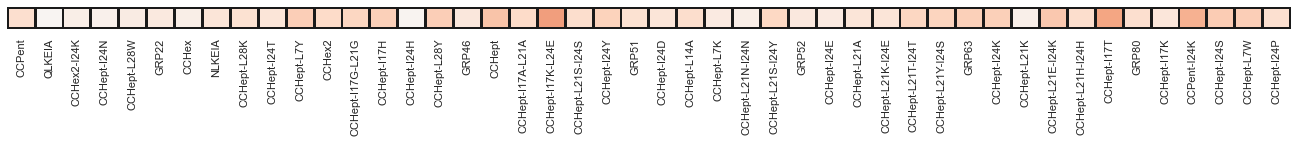

fru


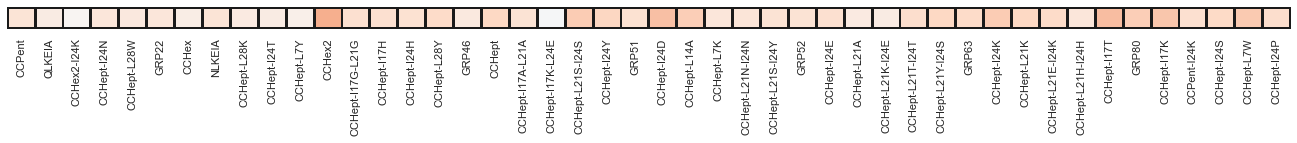

glu


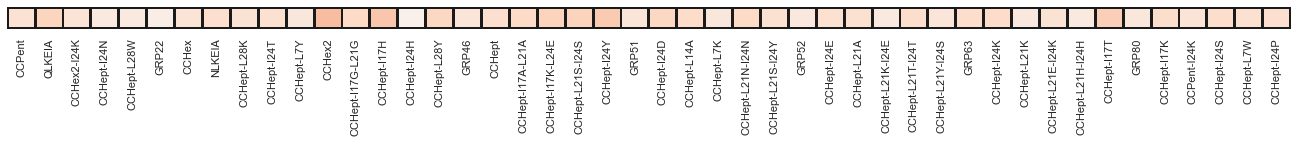

mal


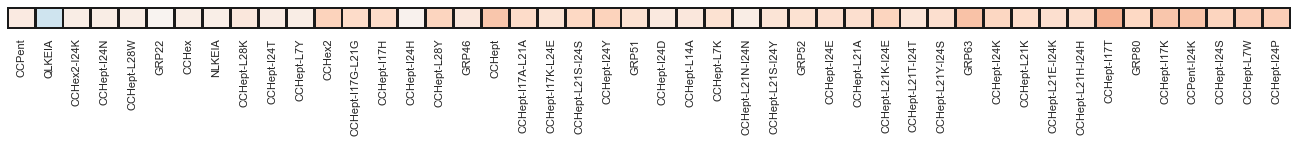

man


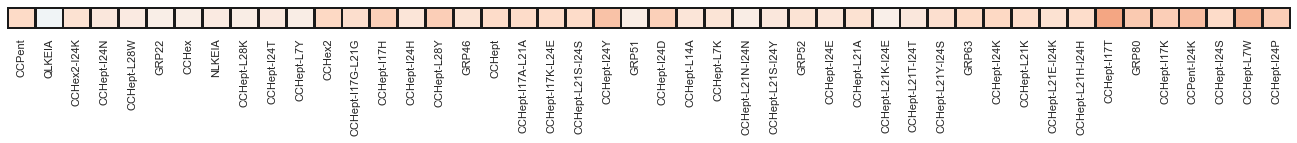

In [14]:
classes = []
for class_name in l_sugar_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
l_sugar_fluor_data_x_val = l_sugar_fluor_data.drop(['Analyte'], axis=1)
vmin = l_sugar_fluor_data_x_val.values.min()
vmax = l_sugar_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(l_sugar_fluor_data.shape[0])
                     if l_sugar_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(l_sugar_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_sugar_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

gluhcl


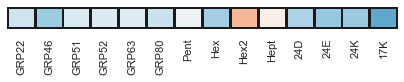

fru


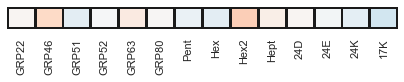

glu


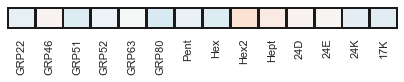

mal


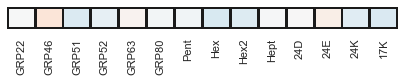

man


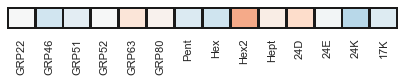

In [15]:
classes = []
for class_name in s_sugar_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
s_sugar_fluor_data_x_val = s_sugar_fluor_data.drop(['Analyte'], axis=1)
vmin = s_sugar_fluor_data_x_val.values.min()
vmax = s_sugar_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(s_sugar_fluor_data.shape[0])
                     if s_sugar_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(s_sugar_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(7,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=s_sugar_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 / 46 features

Mannose


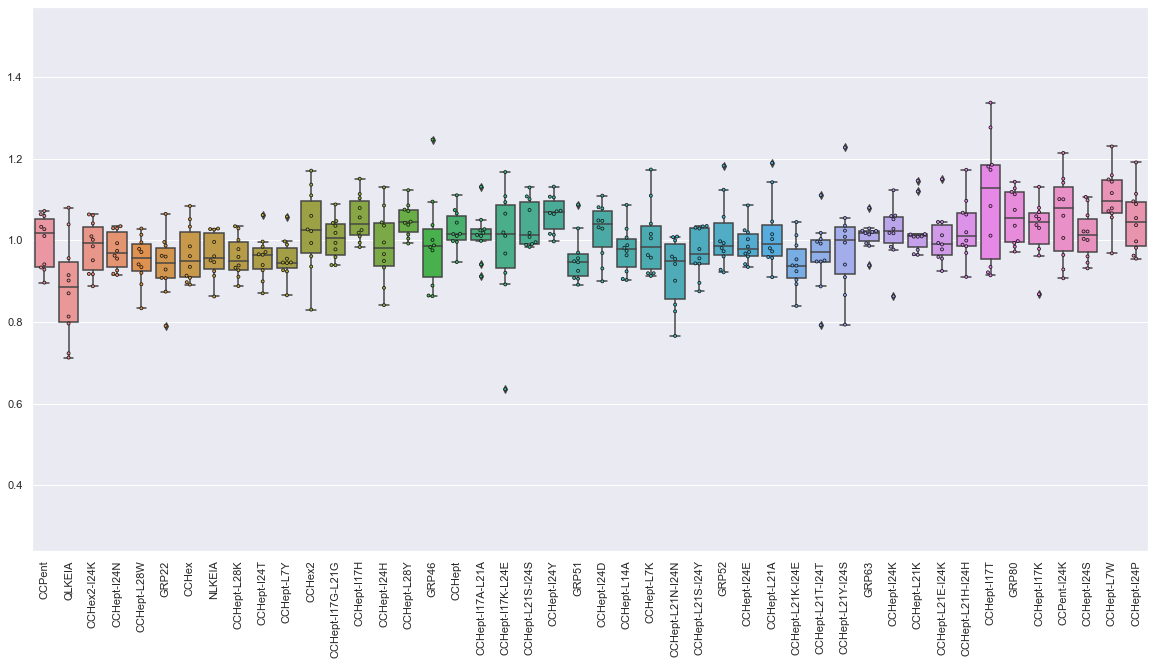

Maltose


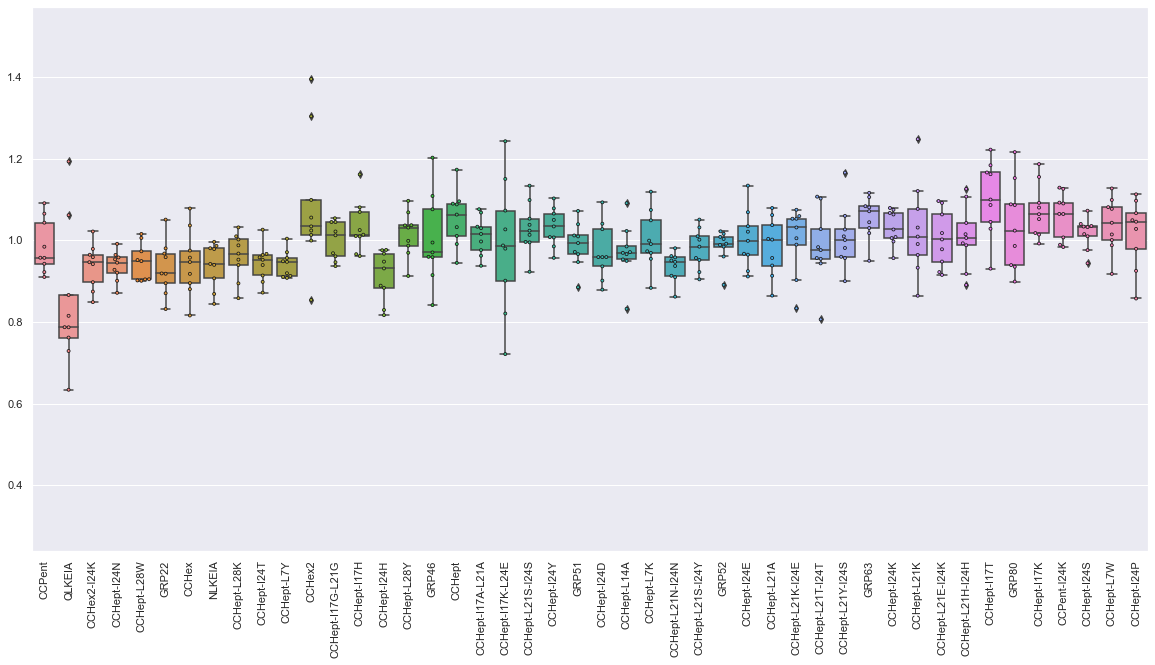

Glucose


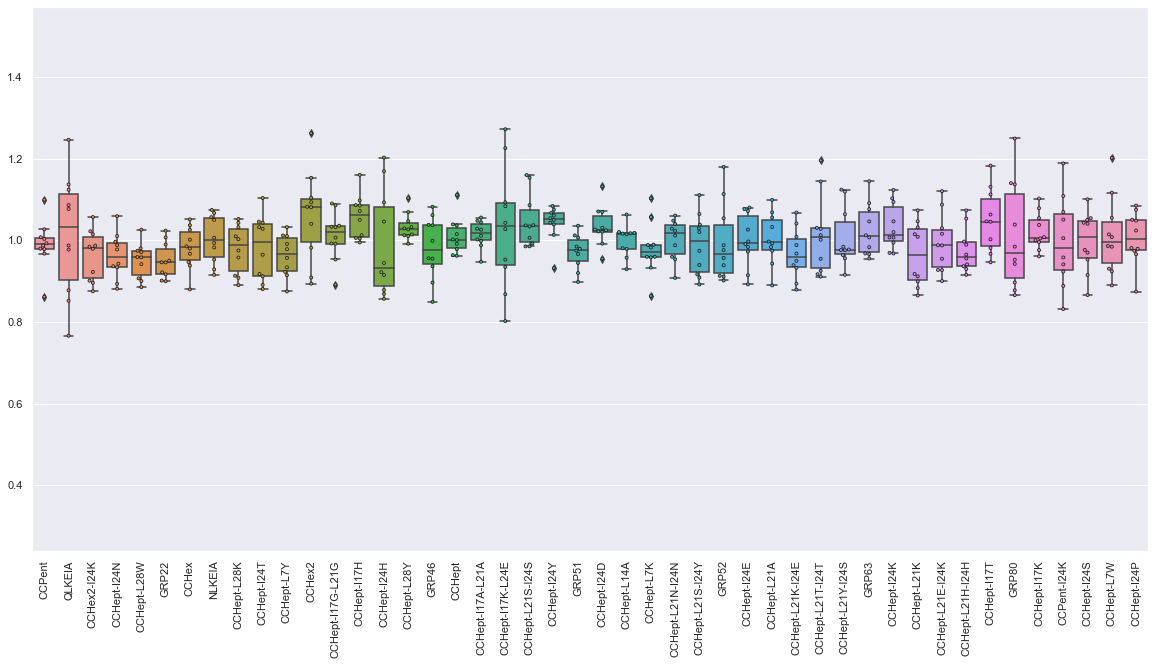

Fructose


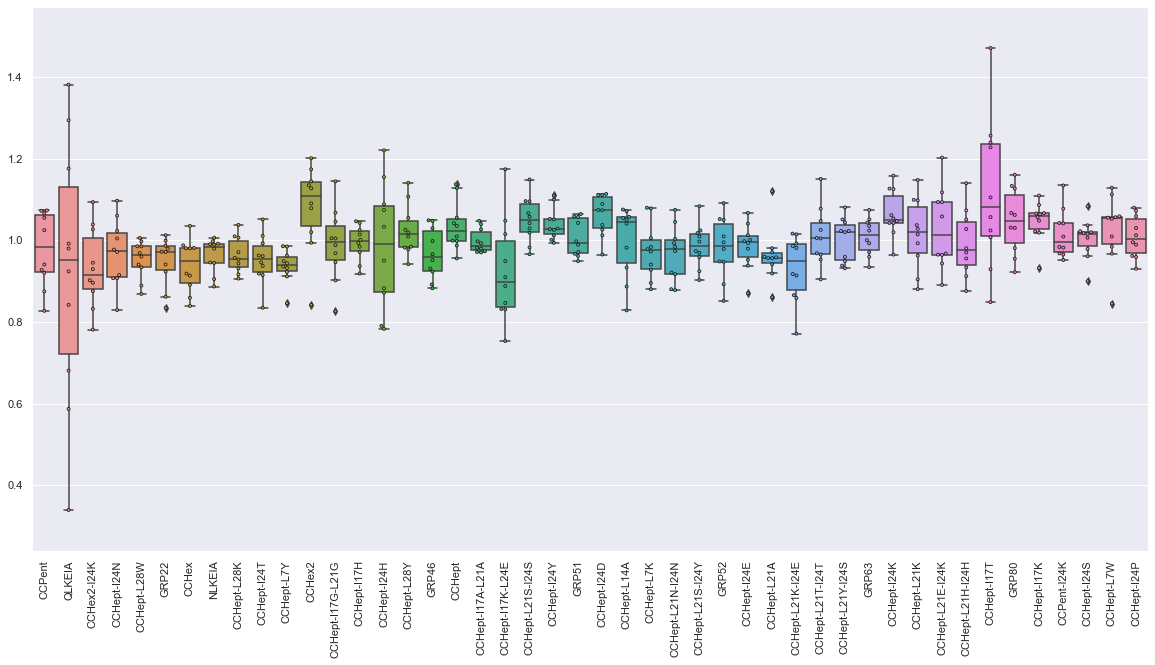

GluHCL


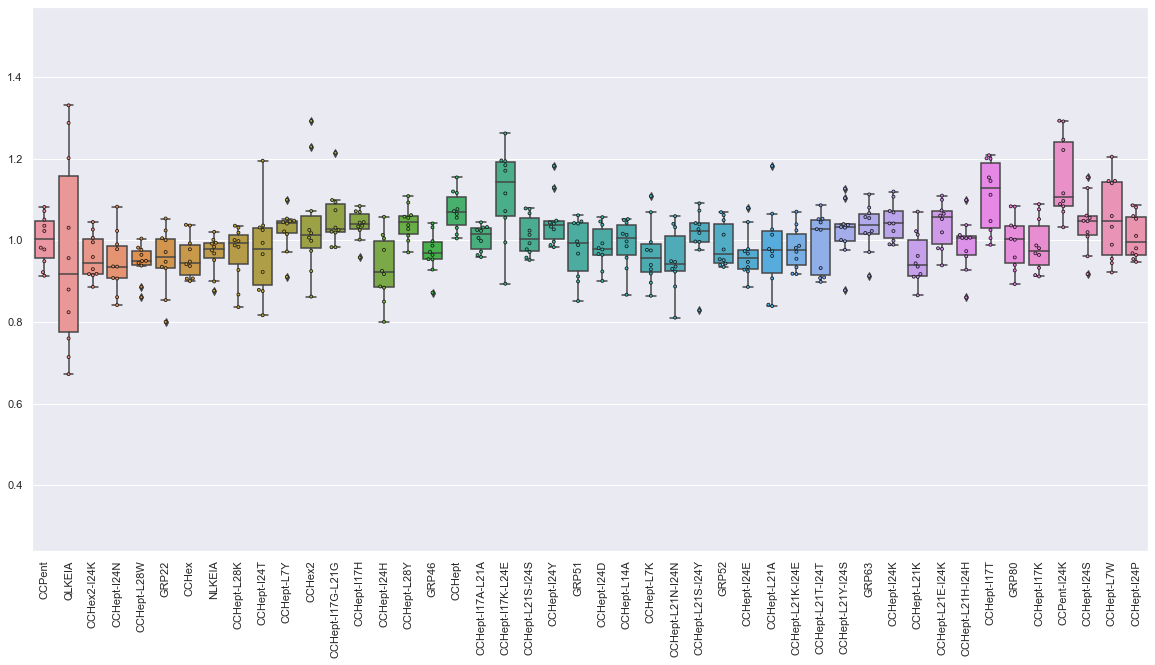

In [16]:
ymin = l_sugar_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_sugar_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

man_indices = [int(i) for i in range(l_sugar_fluor_data.shape[0])
               if l_sugar_fluor_data['Analyte'][i] == 'man']
mal_indices = [int(i) for i in range(l_sugar_fluor_data.shape[0])
               if l_sugar_fluor_data['Analyte'][i] == 'mal']
glu_indices = [int(i) for i in range(l_sugar_fluor_data.shape[0])
               if l_sugar_fluor_data['Analyte'][i] == 'glu']
fru_indices = [int(i) for i in range(l_sugar_fluor_data.shape[0])
               if l_sugar_fluor_data['Analyte'][i] == 'fru']
gluam_indices = [int(i) for i in range(l_sugar_fluor_data.shape[0])
                 if l_sugar_fluor_data['Analyte'][i] == 'gluam']

sns.set(rc={'figure.figsize':(20,10)})
print('Mannose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_fluor_data.iloc[man_indices])
sns.swarmplot(data=l_sugar_fluor_data.iloc[man_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Maltose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_fluor_data.iloc[mal_indices])
sns.swarmplot(data=l_sugar_fluor_data.iloc[mal_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Glucose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_fluor_data.iloc[glu_indices])
sns.swarmplot(data=l_sugar_fluor_data.iloc[glu_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Fructose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_fluor_data.iloc[fru_indices])
sns.swarmplot(data=l_sugar_fluor_data.iloc[fru_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('GluHCL')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_fluor_data.iloc[gluam_indices])
sns.swarmplot(data=l_sugar_fluor_data.iloc[gluam_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Mannose


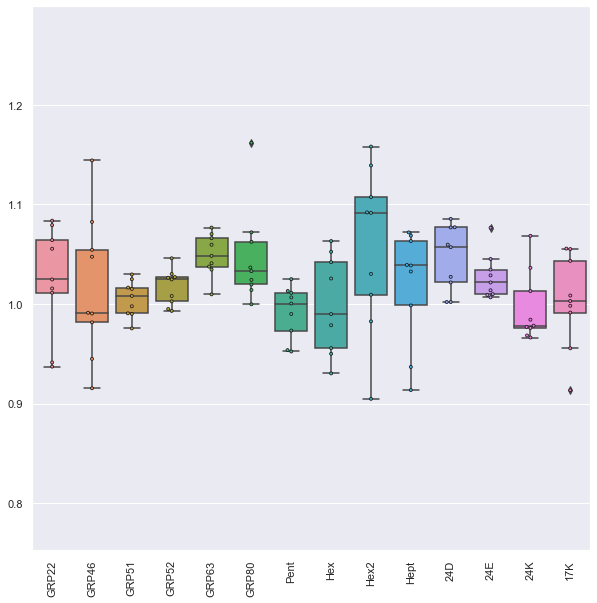

Maltose


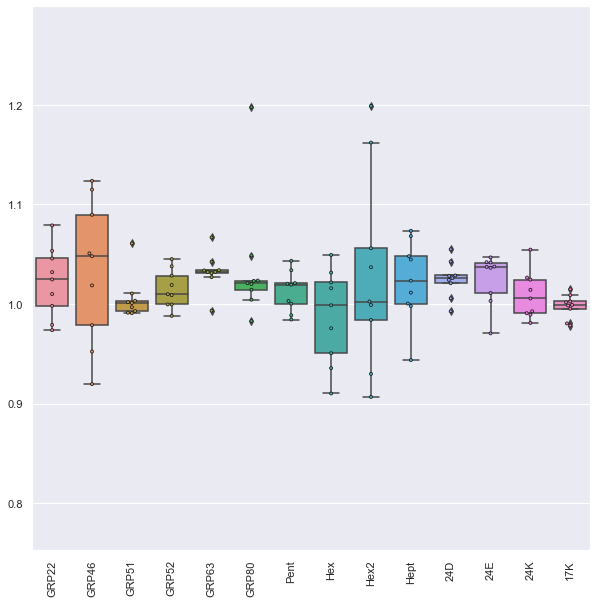

Glucose


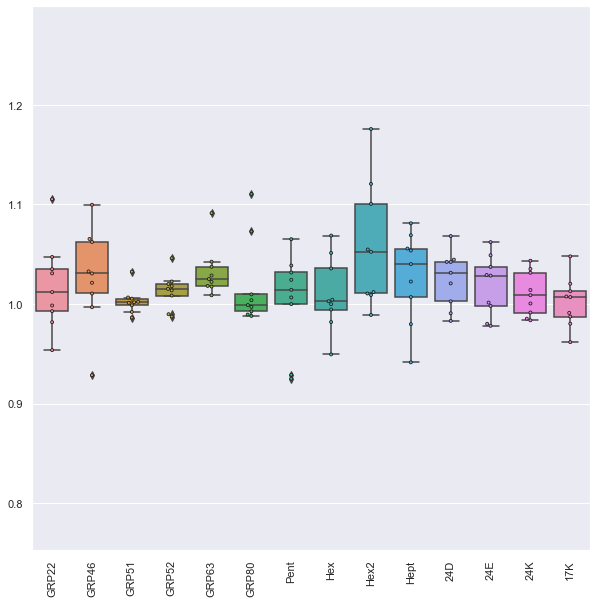

Fructose


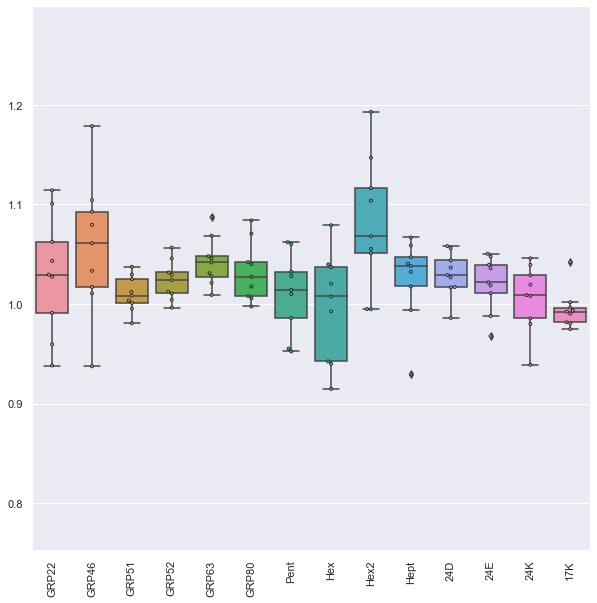

GluHCL


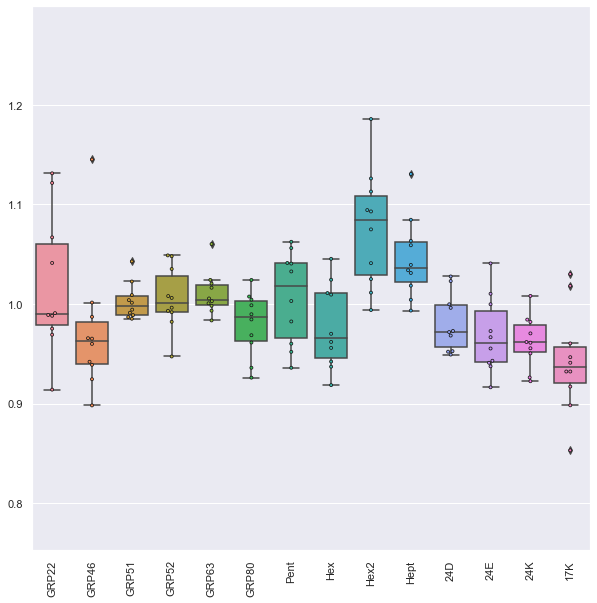

In [17]:
ymin = s_sugar_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = s_sugar_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

man_indices = [int(i) for i in range(s_sugar_fluor_data.shape[0])
               if s_sugar_fluor_data['Analyte'][i] == 'man']
mal_indices = [int(i) for i in range(s_sugar_fluor_data.shape[0])
               if s_sugar_fluor_data['Analyte'][i] == 'mal']
glu_indices = [int(i) for i in range(s_sugar_fluor_data.shape[0])
               if s_sugar_fluor_data['Analyte'][i] == 'glu']
fru_indices = [int(i) for i in range(s_sugar_fluor_data.shape[0])
               if s_sugar_fluor_data['Analyte'][i] == 'fru']
gluam_indices = [int(i) for i in range(s_sugar_fluor_data.shape[0])
                 if s_sugar_fluor_data['Analyte'][i] == 'gluhcl']

sns.set(rc={'figure.figsize':(10,10)})
print('Mannose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_sugar_fluor_data.iloc[man_indices])
sns.swarmplot(data=s_sugar_fluor_data.iloc[man_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Maltose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_sugar_fluor_data.iloc[mal_indices])
sns.swarmplot(data=s_sugar_fluor_data.iloc[mal_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Glucose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_sugar_fluor_data.iloc[glu_indices])
sns.swarmplot(data=s_sugar_fluor_data.iloc[glu_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Fructose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_sugar_fluor_data.iloc[fru_indices])
sns.swarmplot(data=s_sugar_fluor_data.iloc[fru_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('GluHCL')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_sugar_fluor_data.iloc[gluam_indices])
sns.swarmplot(data=s_sugar_fluor_data.iloc[gluam_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

- Large array

First split the data into a training and test set

In [19]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/'
                'Sugars_large_array_ML_results/', fluor_data=l_sugar_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/Sugars_large_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/Sugars_large_array_ML_results/?y


In [20]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 46 features

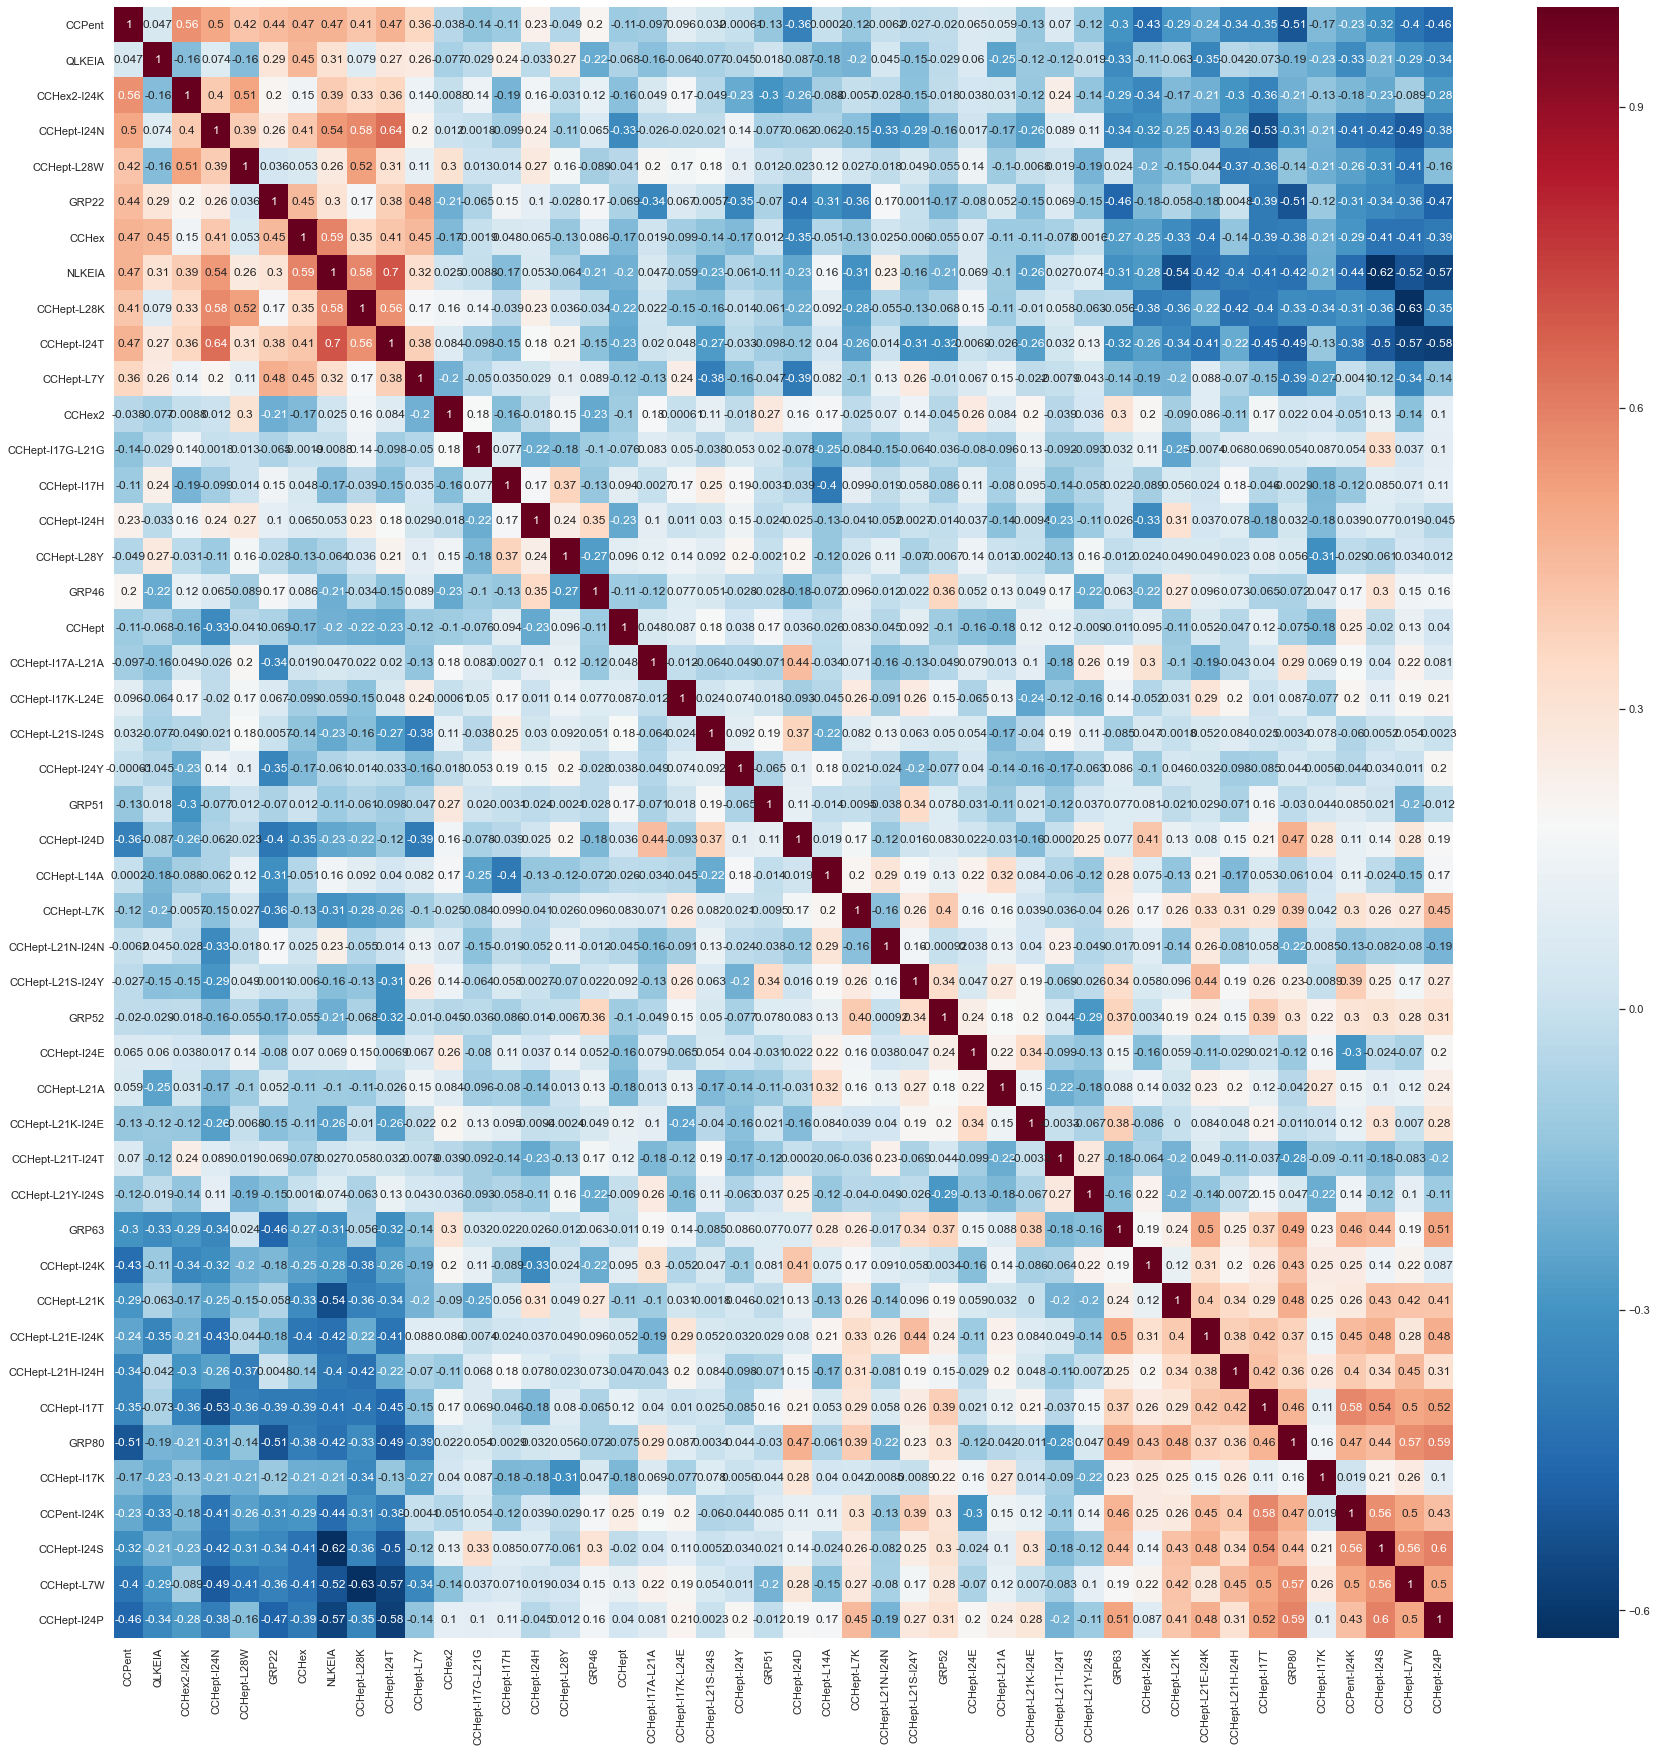

In [21]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features

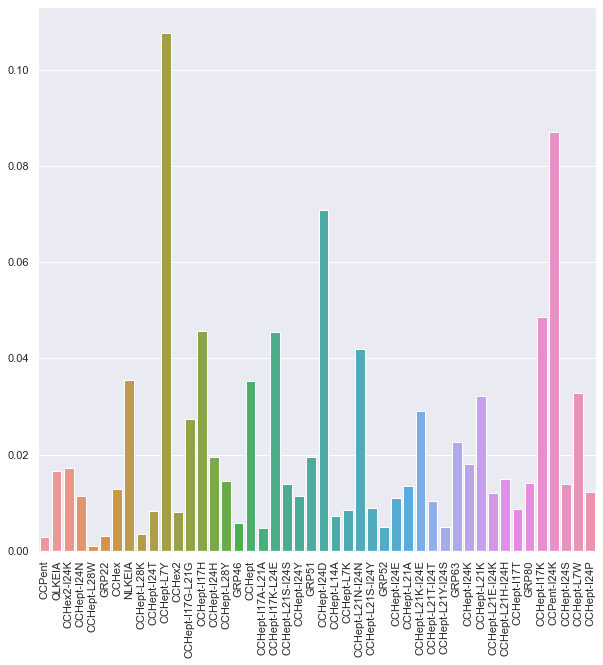

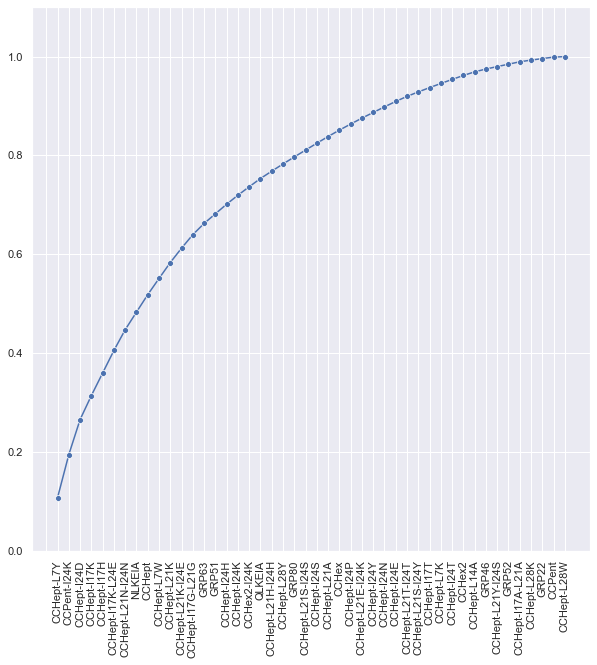

Feature     Score
0         CCHept-L7Y  0.107668
1        CCPent-I24K  0.087190
2        CCHept-I24D  0.070795
3        CCHept-I17K  0.048541
4        CCHept-I17H  0.045644
5   CCHept-I17K-L24E  0.045573
6   CCHept-L21N-I24N  0.042019
7             NLKEIA  0.035582
8             CCHept  0.035322
9         CCHept-L7W  0.032735
10       CCHept-L21K  0.032236
11  CCHept-L21K-I24E  0.029115
12  CCHept-I17G-L21G  0.027356
13             GRP63  0.022639
14             GRP51  0.019509
15       CCHept-I24H  0.019495
16       CCHept-I24K  0.018106
17       CCHex2-I24K  0.017145
18            QLKEIA  0.016653
19  CCHept-L21H-I24H  0.014896
20       CCHept-L28Y  0.014546
21             GRP80  0.014186
22  CCHept-L21S-I24S  0.013921
23       CCHept-I24S  0.013885
24       CCHept-L21A  0.013573
25             CCHex  0.012909
26       CCHept-I24P  0.012299
27  CCHept-L21E-I24K  0.011981
28       CCHept-I24Y  0.011425
29       CCHept-I24N  0.011409
30       CCHept-I24E  0.010953
31  CCHept-L21T-I24T  0.010253
32  CCHept-L21S-I24Y  0.009004
33       CCHept-I17T  0.008661
34        CCHept-L7K  0.008390
35       CCHept-I24T  0.008205
36            CCHex2  0.008044
37       CCHept-L14A  0.007303
38             GRP46  0.005714
39  CCHept-L21Y-I24S  0.004931
40             GRP52  0.004859
41  CCHept-I17A-L21A  0.004840
42       CCHept-L28K  0.003434
43             GRP22  0.003074
44            CCPent  0.002969
45       CCHept-L28W  0.001013

In [22]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

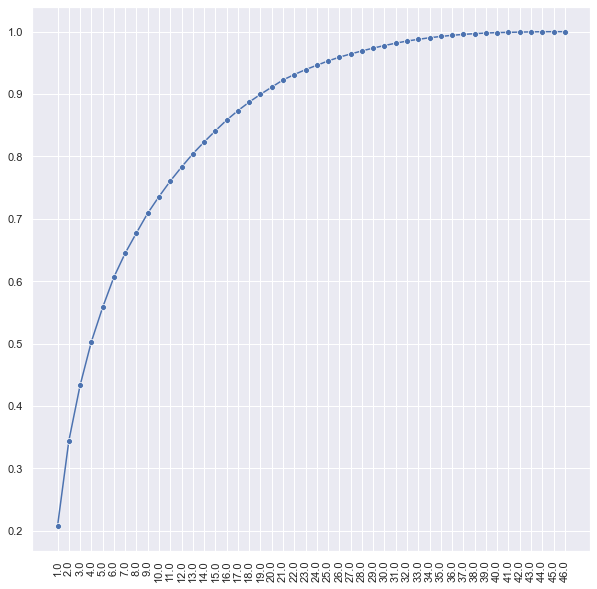

In [23]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [24]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [25]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.087548 -0.716839    -0.014096    -0.099791    -0.007822   
2         -0.170238  0.601441    -0.176519    -0.127439    -0.115484   
3         -0.148098 -0.023702    -0.131103    -0.088224    -0.073554   
4          0.021865  0.020412     0.030234     0.019561     0.112790   
5          0.047308  0.071311    -0.042160     0.103462     0.133759   
6         -0.148188 -0.008942    -0.015569     0.104699     0.004154   
7         -0.042399 -0.013857    -0.025999    -0.030556     0.007804   
8         -0.012635 -0.002470    -0.020762    -0.006044    -0.018675   
9         -0.046207  0.054469    -0.047803    -0.097250    -0.024709   
10        -0.169521 -0.081633    -0.288219    -0.173902    -0.034384   
11         0.094354 -0.077288     0.183306     0.152797    -0.081650   
12        -0.052367  0.014207    -0.058997     0.157542    -0.026395   
13        -0.056514  0.035968    -0.134895    -0.102098    -0.144870   
14         0.172213 -0.049727    -0.150987    -0.082658    -0.092357   
15         0.052877 -0.053241    -0.156180     0.188329     0.006606   
16         0.164022 -0.011139     0.273827     0.075720     0.154470   
17        -0.093567 -0.095622    -0.392668     0.212383    -0.065766   
18         0.066862 -0.005998     0.032620    -0.002126    -0.056244   
19        -0.111010 -0.084240     0.036345    -0.012753    -0.021075   
20         0.015489  0.118916     0.145748     0.071750    -0.038936   
21        -0.381328  0.011112    -0.048662     0.041618     0.028956   
22        -0.225571 -0.038584     0.203471    -0.303527     0.017443   
23        -0.088391  0.105180     0.059668     0.034338     0.048297   
24         0.350509  0.044941     0.048863     0.000115     0.107011   
25         0.176986  0.025085    -0.263620    -0.251733    -0.104561   
26         0.142487  0.005028    -0.109879    -0.080420     0.084559   
27        -0.118059 -0.046054     0.141517    -0.108899     0.044369   
28         0.170447 -0.001978    -0.094738     0.146703    -0.109721   
29         0.109543 -0.134159    -0.174892     0.138714    -0.044914   
30         0.067196 -0.039300    -0.119840    -0.038310    -0.065534   
31         0.064718  0.034498    -0.128378    -0.055657    -0.089318   
32        -0.052197 -0.027721     0.026411    -0.132921    -0.366872   
33        -0.034480  0.059608     0.198681     0.144749    -0.345748   
34         0.185914 -0.015456     0.050007    -0.187587    -0.221637   
35        -0.041331 -0.061252     0.068096     0.364704    -0.287234   
36        -0.210000 -0.028723    -0.108350     0.022117     0.247484   
37        -0.147449  0.063319    -0.062871     0.224126    -0.043841   
38        -0.021010 -0.031196    -0.017501    -0.249251    -0.029385   
39         0.148463  0.024649     0.066866    -0.177171    -0.215022   
40        -0.054360 -0.043480    -0.083793     0.170443    -0.129085   
41         0.120674  0.051409    -0.211529     0.070723     0.174809   
42         0.061168 -0.005995     0.195442    -0.125249    -0.202281   
43         0.333385  0.052847     0.081790     0.076888    -0.011811   
44         0.248912 -0.007473    -0.227546    -0.113134     0.314272   
45        -0.135503  0.048047     0.261015    -0.090762     0.352991   
46        -0.020391  0.049596     0.027168     0.310554     0.095601   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.122591 -0.156952 -0.129484    -0.083192    -0.163446  ...   
2         -0.051457 -0.043558 -0.090188    -0.126918    -0.101917  ...   
3         -0.114179 -0.063131 -0.020465    -0.019127    -0.094781  ...   
4         -0.087469 -0.056686  0.056005     0.072732     0.096835  ...   
5         -0.049613  0.016754  0.024867     0.141651     0.071030  ...   
6         -0.169377 -0.139147 -0.08542

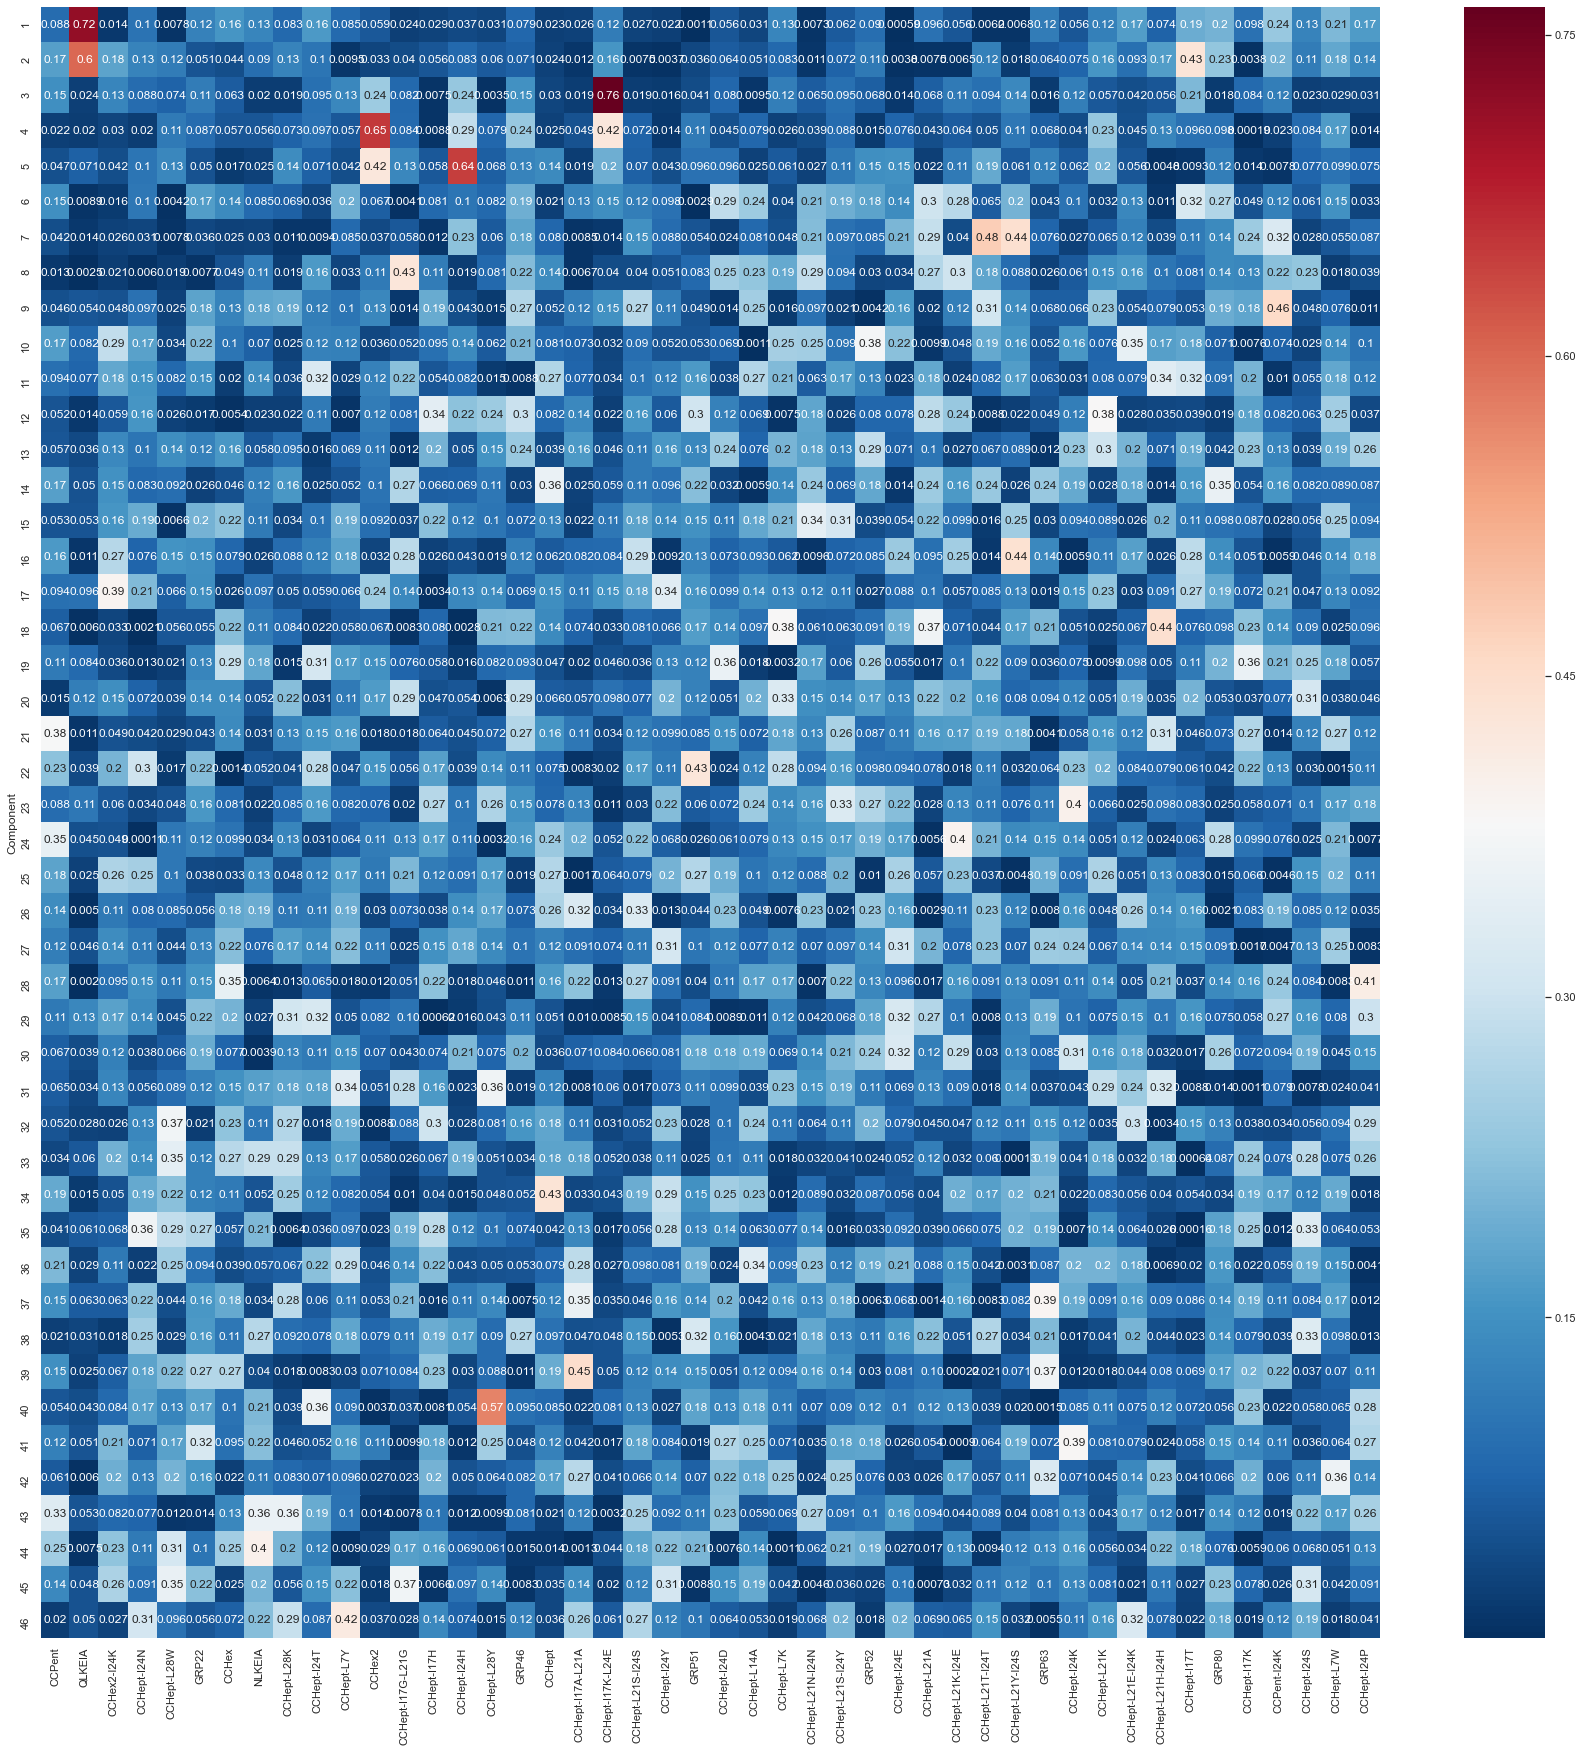

In [26]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Relative contribution to the different components of each barrel

In [27]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [28]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.015965  0.224144     0.002592     0.017917     0.001563   
2          0.031044  0.188061     0.032457     0.022882     0.023077   
3          0.027007  0.007411     0.024106     0.015841     0.014698   
4          0.003987  0.006383     0.005559     0.003512     0.022539   
5          0.008627  0.022298     0.007752     0.018577     0.026729   
6          0.027023  0.002796     0.002863     0.018799     0.000830   
7          0.007732  0.004333     0.004780     0.005486     0.001559   
8          0.002304  0.000772     0.003817     0.001085     0.003732   
9          0.008426  0.017031     0.008790     0.017461     0.004938   
10         0.030913  0.025525     0.052995     0.031224     0.006871   
11         0.017206  0.024167     0.033704     0.027435     0.016316   
12         0.009549  0.004442     0.010848     0.028287     0.005275   
13         0.010306  0.011247     0.024803     0.018332     0.028949   
14         0.031404  0.015549     0.027762     0.014841     0.018456   
15         0.009642  0.016648     0.028717     0.033814     0.001320   
16         0.029911  0.003483     0.050349     0.013596     0.030868   
17         0.017063  0.029899     0.072200     0.038133     0.013142   
18         0.012193  0.001876     0.005998     0.000382     0.011239   
19         0.020243  0.026341     0.006683     0.002290     0.004211   
20         0.002824  0.037183     0.026799     0.012883     0.007781   
21         0.069538  0.003475     0.008947     0.007472     0.005786   
22         0.041134  0.012065     0.037412     0.054498     0.003486   
23         0.016119  0.032888     0.010971     0.006165     0.009651   
24         0.063918  0.014053     0.008984     0.000021     0.021384   
25         0.032275  0.007844     0.048472     0.045199     0.020894   
26         0.025983  0.001572     0.020204     0.014439     0.016897   
27         0.021529  0.014400     0.026021     0.019553     0.008866   
28         0.031082  0.000619     0.017419     0.026340     0.021926   
29         0.019976  0.041949     0.032157     0.024906     0.008975   
30         0.012254  0.012289     0.022035     0.006879     0.013096   
31         0.011802  0.010787     0.023605     0.009993     0.017848   
32         0.009518  0.008668     0.004856     0.023866     0.073312   
33         0.006288  0.018638     0.036531     0.025990     0.069091   
34         0.033903  0.004833     0.009195     0.033681     0.044290   
35         0.007537  0.019153     0.012521     0.065482     0.057398   
36         0.038295  0.008981     0.019922     0.003971     0.049455   
37         0.026888  0.019799     0.011560     0.040242     0.008761   
38         0.003831  0.009754     0.003218     0.044753     0.005872   
39         0.027073  0.007707     0.012295     0.031811     0.042968   
40         0.009913  0.013595     0.015407     0.030603     0.025795   
41         0.022006  0.016075     0.038894     0.012698     0.034932   
42         0.011154  0.001874     0.035936     0.022488     0.040422   
43         0.060795  0.016524     0.015039     0.013805     0.002360   
44         0.045391  0.002337     0.041839     0.020313     0.062801   
45         0.024710  0.015024     0.047993     0.016296     0.070538   
46         0.003719  0.015508     0.004995     0.055760     0.019104   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.020840  0.028558  0.024627     0.015874     0.029834  ...   
2          0.008747  0.007926  0.017153     0.024218     0.018603  ...   
3          0.019410  0.011487  0.003892     0.003650     0.017300  ...   
4          0.014869  0.010314  0.010652     0.013878     0.017675  ...   
5          0.008434  0.003049  0.004729     0.027029     0.012965  ...   
6          0.028793  0.025319  0.01624

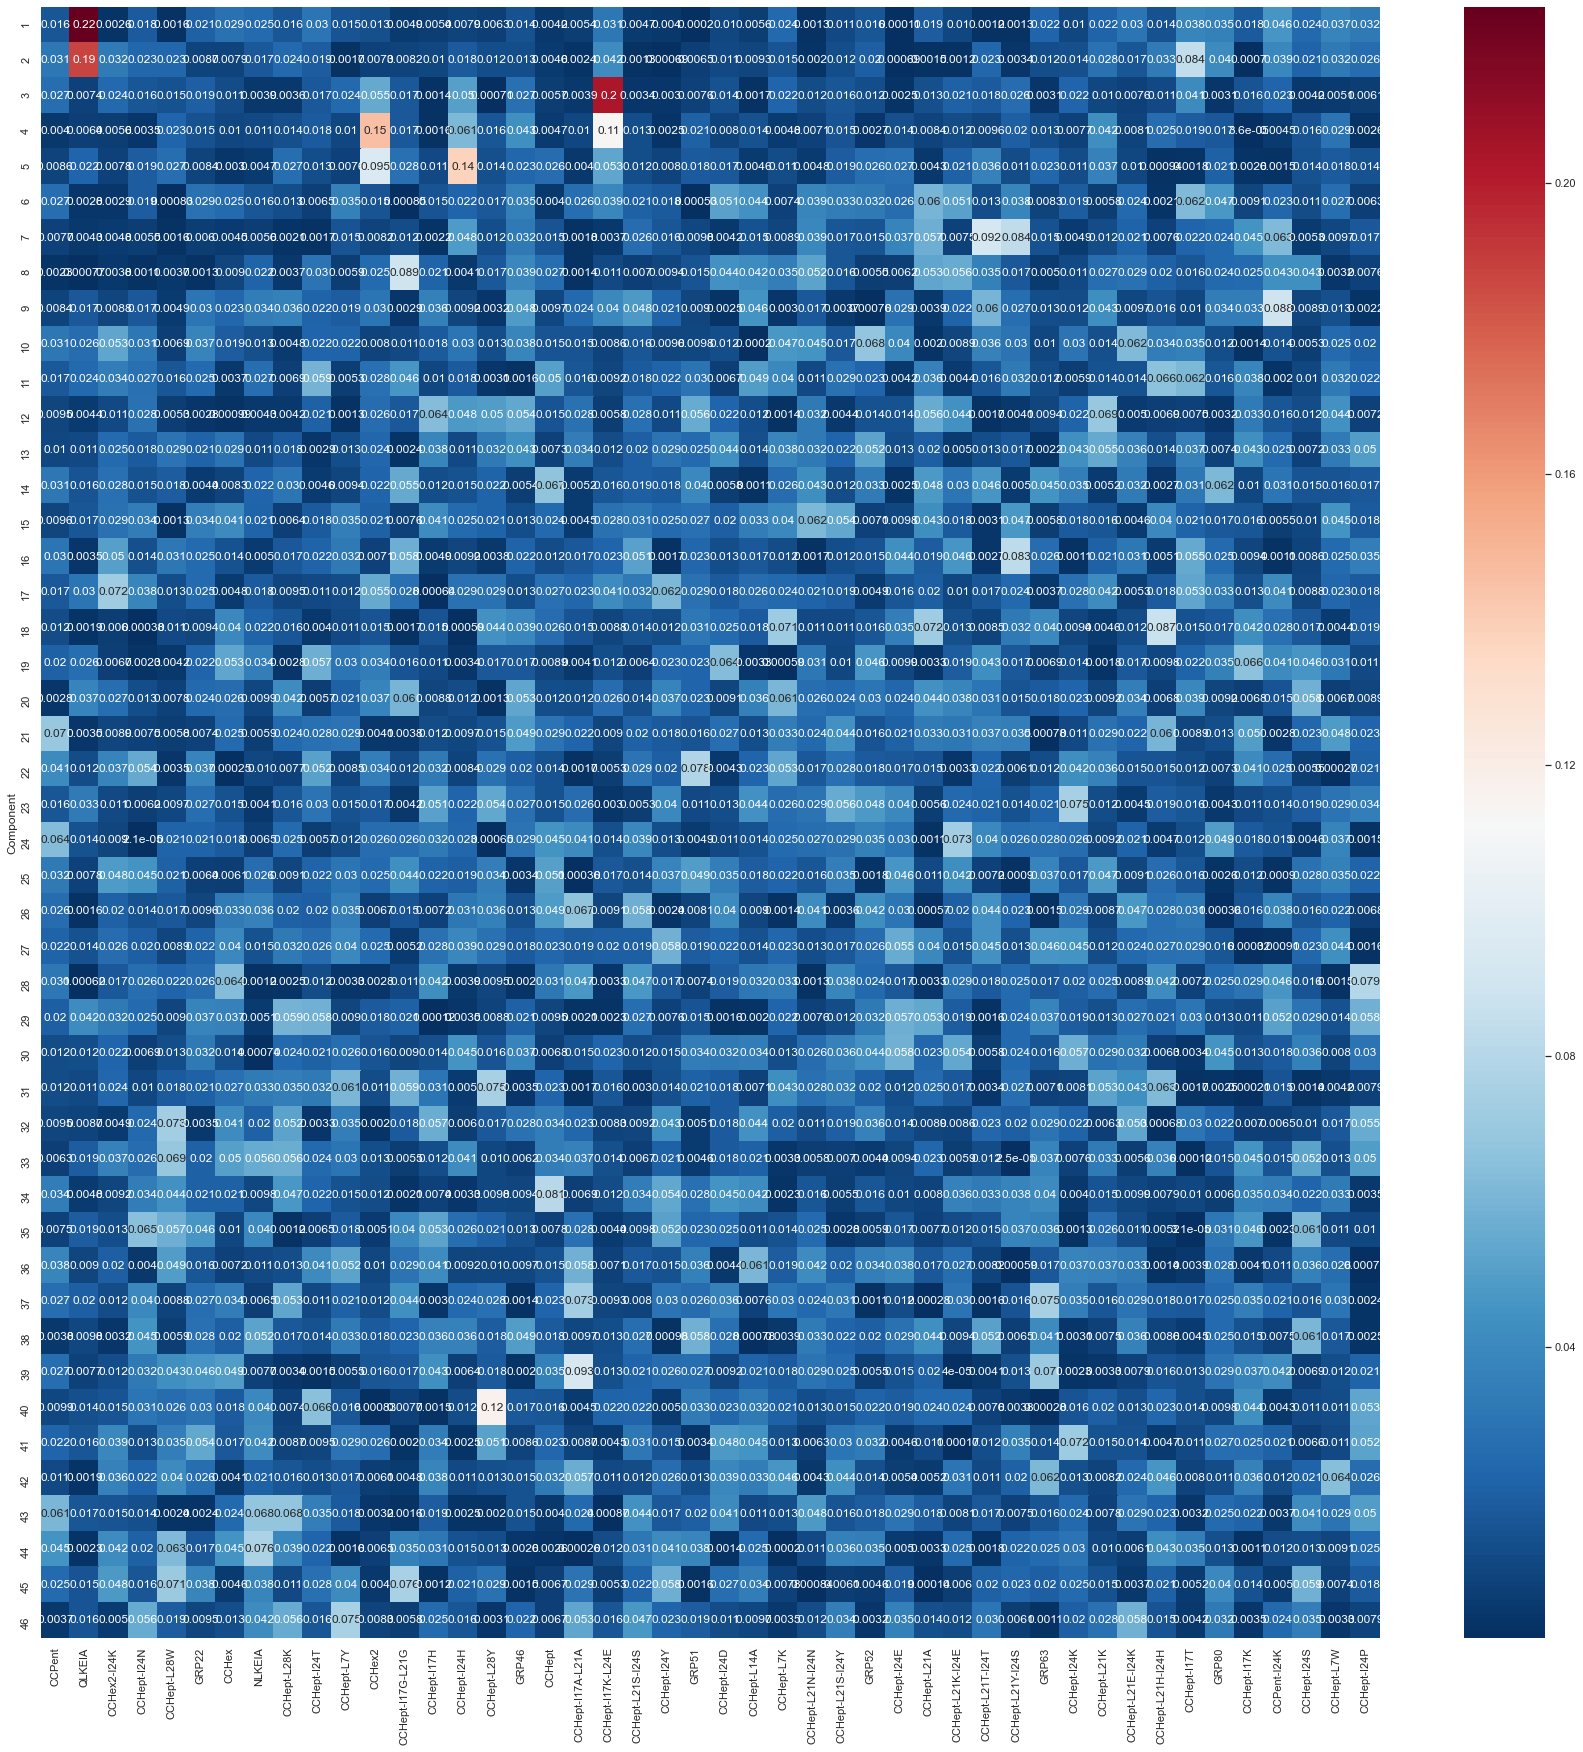

In [29]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [30]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

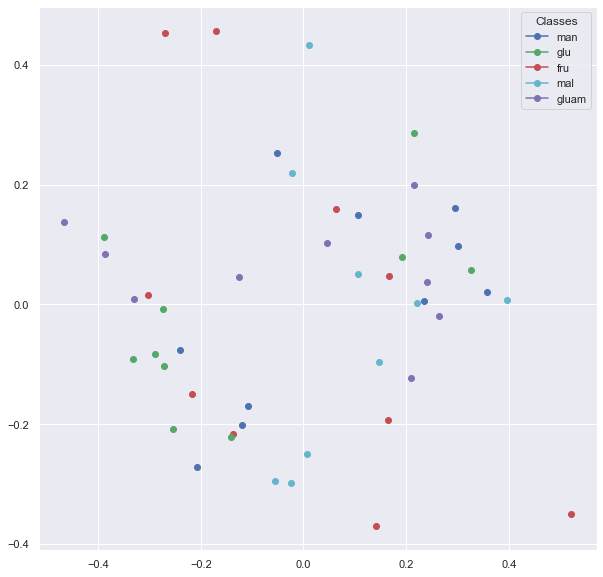

In [31]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['man', 'glu', 'fru', 'mal', 'gluam'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

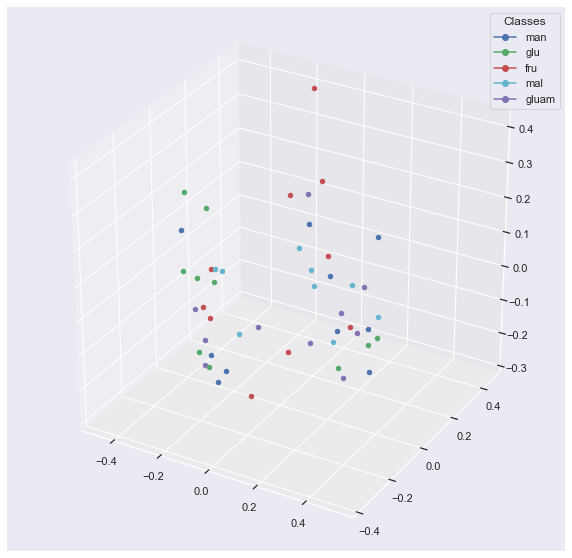

In [32]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['man', 'glu', 'fru', 'mal', 'gluam'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

95% of the data is explained by ~25 features => won't perform any PCA. (Unfortunately because n_features > n_samples, can't perform PCA with 46 features to ensure that all features are orthogonal.)

In [33]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [36]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0}
Best score: 0.3






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0}
Best score: 0.3
All parameter combinations tested:
1 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0} 0.3
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794} 0.25
3 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 31622.776601683792} 0.25
4

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.08838834764831845}
Best score: 0.375






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.08838834764831845}
Best score: 0.375
All parameter combinations tested:
1 {'LinearSVC__C': 0.08838834764831845} 0.375
2 {'LinearSVC__C': 0.1767766952966369} 0.325
3 {'LinearSVC__C': 23170.47500592079} 0.275
4 {'LinearSVC__C': 0.7071067811865476} 0.3
5 {'LinearSVC__C': 362.03867196751236} 0.3
6 {'LinearSVC__C': 45.254833995939045} 0.3
7 {'LinearSVC__C': 128.0} 0.35
8 {'LinearSVC__C': 22.627416997969522} 0.3
9 {'LinearSVC__C': 0.03125} 0.3
10 {'LinearSVC__C': 5.656854249492381} 0.3
11 {'LinearSVC__C': 64.0} 0.3
12 {'LinearSVC__C': 5792.618751480198} 0.275
13 {'LinearSVC__C': 11.313708498984761} 0.3
14 {'LinearSVC__C': 0.125} 0.375
15 {'LinearSVC__C': 0.0625} 0.375
16 {'LinearSVC__C': 32.0} 0.3
17 {'LinearSVC__C': 16384.0} 0.275
18 {'LinearSVC__C': 0.5} 0.3
19 {'LinearSVC__C': 0.25} 0.3
20 {'LinearSVC__C

In [37]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'sag', 'Logisti...                0.300   
1  {'KNeighborsClassifier__weights': 'uniform', '...                0.325   
2                                                 {}                0.175   
3              {'LinearSVC__C': 0.08838834764831845}                0.375   
4  {'SVC__gamma': 0.00034526698300124393, 'SVC__C...                0.300   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.259211                0.158033  
1             0.241000                0.090945  
2             0.175000                0.127475  
3             0.307000                0.104880  
4             0.181000                0.071277

So, from this spot check, a **support vector classifier with linear kernel** does a good job.

So, run hyperparameter optimisation for LinearSVC.

In [41]:
fixed_params = ml.define_fixed_model_params(clf=LinearSVC())
random_tuned_params = ml.define_tuned_model_params(clf=LinearSVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.08838834764831845}
Best score: 0.3


In [43]:
grid_tuned_params = {'C': np.linspace(0.01, 1, 100)}

svc_grid_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.54}
Best score: 0.4


### So, optimal hyperparameter combination:
- C = 0.54

Model cross-validation score: [0.25  0.25  0.125 0.5   0.375]
accuracy_score: 0.4444444444444444
recall_score: 0.4
precision_score: 0.55
f1_score: 0.4333333333333333
cohen_kappa_score: 0.296875
None


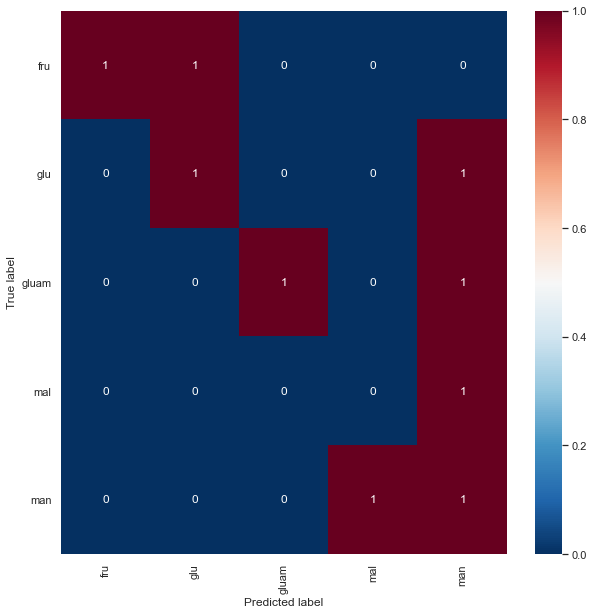

true


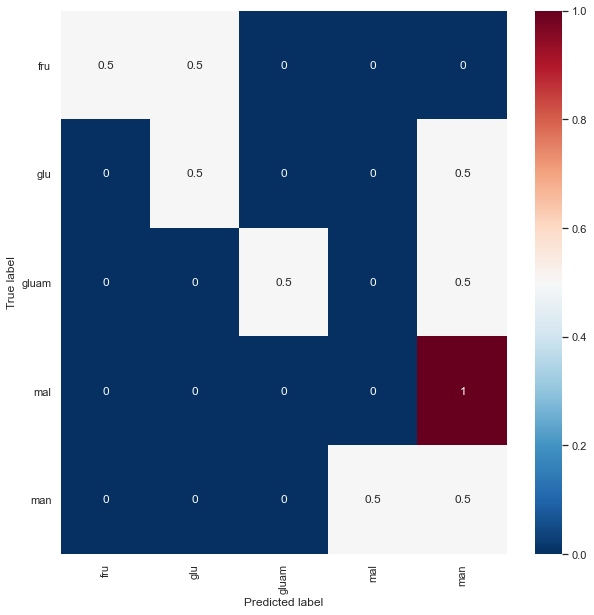

pred


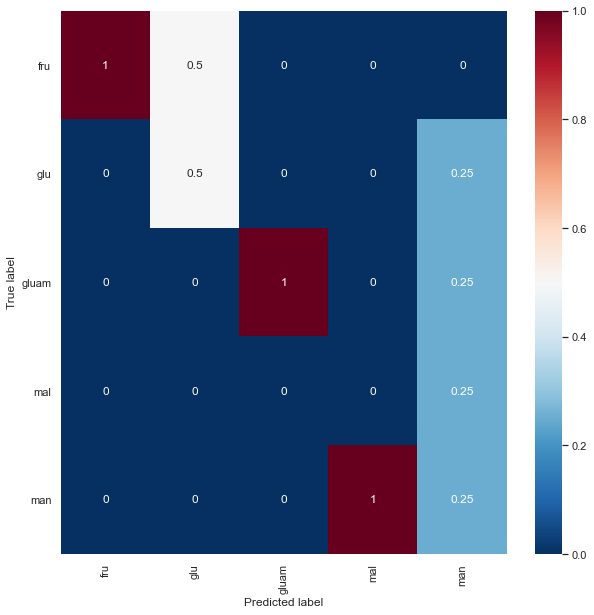

In [44]:
final_params = {'C': 0.54}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

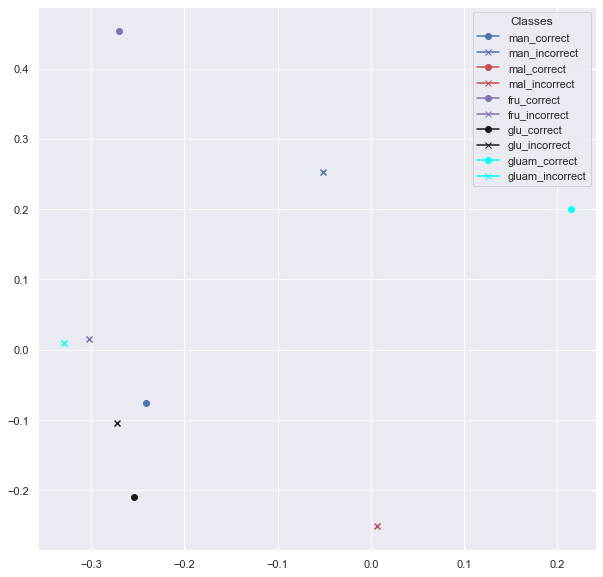

In [46]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['man_correct', 'man_incorrect', 'mal_correct', 'mal_incorrect', 'fru_correct', 'fru_incorrect',
                'glu_correct', 'glu_incorrect', 'gluam_correct', 'gluam_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

- Standard array

In [47]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [48]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/'
                'Sugars_standard_array_ML_results/', fluor_data=s_sugar_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/Sugars_standard_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/Sugars_standard_array_ML_results/?
Input not recognised - please specify "yes" or "no"
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/Sugars/Sugars_standard_array_ML_results/?y


In [49]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

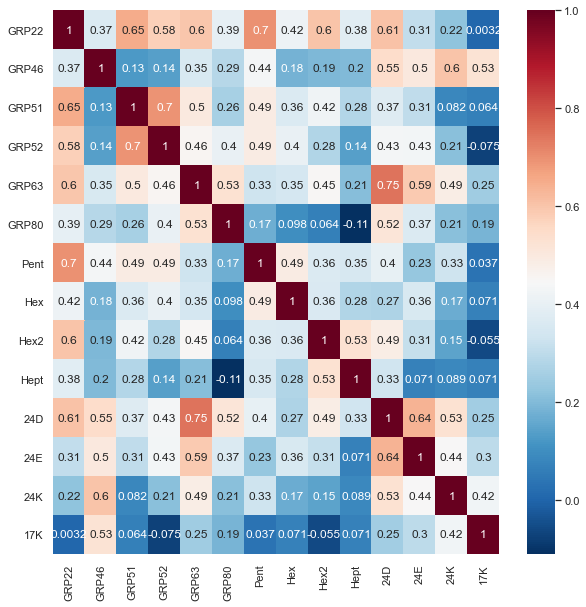

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80      Pent  \
GRP22  1.000000  0.365290  0.649172  0.576459  0.597983  0.393352  0.699682   
GRP46  0.365290  1.000000  0.127105  0.138082  0.354302  0.288190  0.435584   
GRP51  0.649172  0.127105  1.000000  0.695961  0.497132  0.259328  0.490348   
GRP52  0.576459  0.138082  0.695961  1.000000  0.455072  0.403269  0.490842   
GRP63  0.597983  0.354302  0.497132  0.455072  1.000000  0.529325  0.331730   
GRP80  0.393352  0.288190  0.259328  0.403269  0.529325  1.000000  0.172741   
Pent   0.699682  0.435584  0.490348  0.490842  0.331730  0.172741  1.000000   
Hex    0.418268  0.184335  0.363306  0.402405  0.348998  0.098366  0.488745   
Hex2   0.603287  0.193463  0.421277  0.276596  0.452852  0.063953  0.363676   
Hept   0.383669  0.198520  0.281283  0.138082  0.208881 -0.110207  0.351958   
24D    0.605692  0.548443  0.374406  0.434968  0.747518  0.515880  0.399198   
24E    0.308798  0.502189  0.305828  0.429417  0.590133  0.365772  0.231946   
24K    0.219927  0.601357  0.081961  0.212951  0.487635  0.213938  0.328893   
17K    0.003207  0.526611  0.063706 -0.075177  0.247734  0.186186  0.037064   

            Hex      Hex2      Hept       24D       24E       24K       17K  
GRP22  0.418268  0.603287  0.383669  0.605692  0.308798  0.219927  0.003207  
GRP46  0.184335  0.193463  0.198520  0.548443  0.502189  0.601357  0.526611  
GRP51  0.363306  0.421277  0.281283  0.374406  0.305828  0.081961  0.063706  
GRP52  0.402405  0.276596  0.138082  0.434968  0.429417  0.212951 -0.075177  
GRP63  0.348998  0.452852  0.208881  0.747518  0.590133  0.487635  0.247734  
GRP80  0.098366  0.063953 -0.110207  0.515880  0.365772  0.213938  0.186186  
Pent   0.488745  0.363676  0.351958  0.399198  0.231946  0.328893  0.037064  
Hex    1.000000  0.360222  0.278323  0.274376  0.357879  0.168178  0.070614  
Hex2   0.360222  1.000000  0.531175  0.487018  0.311008  0.148443 -0.055196  
Hept   0.278323  0.531175  1.000000  0.334567  0.071354  0.088745  0.070860  
24D    0.274376  0.487018  0.334567  1.000000  0.638483  0.528461  0.251804  
24E    0.357879  0.311008  0.071354  0.638483  1.000000  0.444958  0.301634  
24K    0.168178  0.148443  0.088745  0.528461  0.444958  1.000000  0.423497  
17K    0.070614 -0.055196  0.070860  0.251804  0.301634  0.423497  1.000000

In [50]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

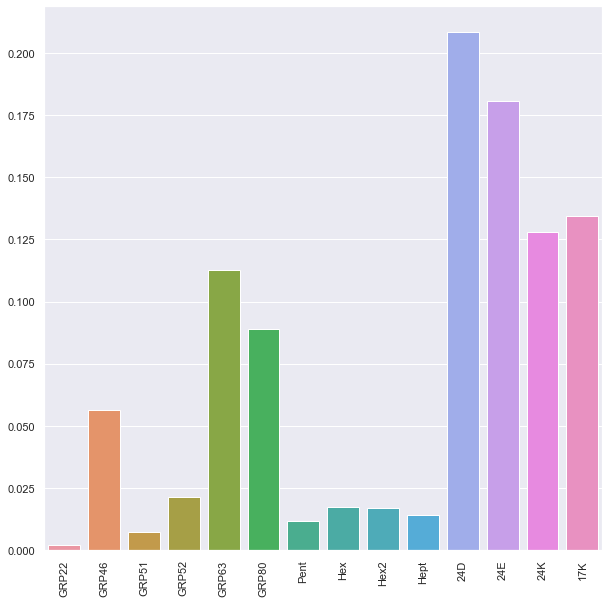

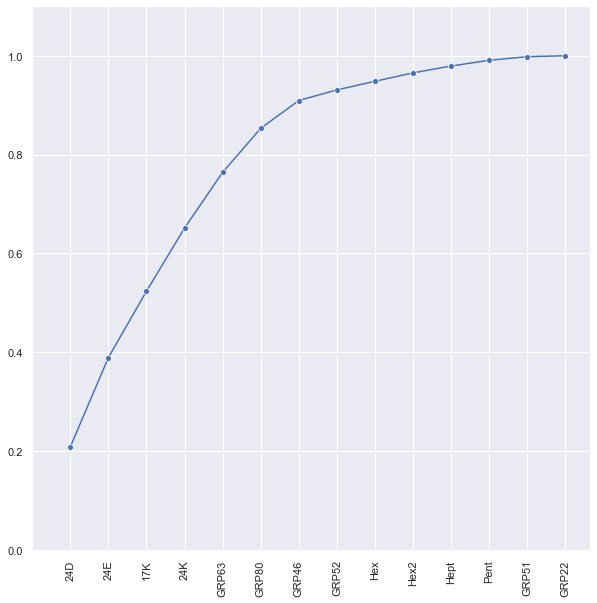

Feature     Score
0      24D  0.208406
1      24E  0.180775
2      17K  0.134276
3      24K  0.127925
4    GRP63  0.112717
5    GRP80  0.089073
6    GRP46  0.056259
7    GRP52  0.021454
8      Hex  0.017454
9     Hex2  0.017003
10    Hept  0.013897
11    Pent  0.011602
12   GRP51  0.007268
13   GRP22  0.001891

In [51]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

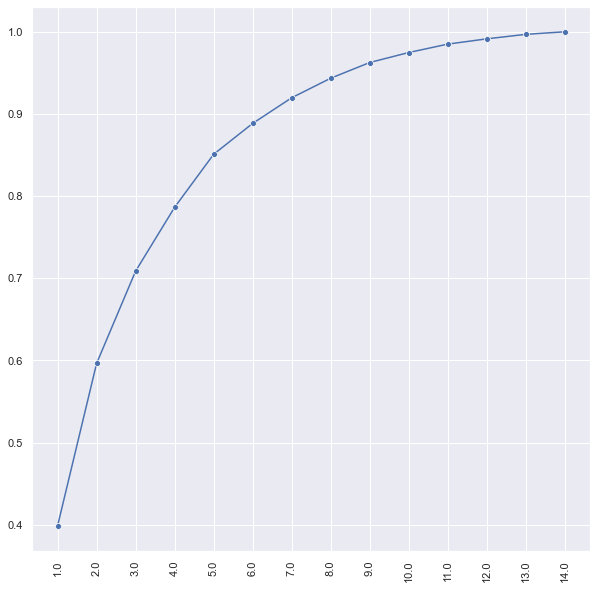

In [52]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [53]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [54]:
pca_components

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80  \
Component                                                               
1         -0.391047 -0.449104 -0.094124 -0.107081 -0.168736 -0.116106   
2          0.151692 -0.580124  0.087544  0.046634 -0.034603 -0.230085   
3          0.345801 -0.364211  0.093775  0.183840  0.141219  0.707688   
4          0.317005  0.233978  0.007936  0.031533 -0.157148 -0.124099   
5          0.056533  0.244877 -0.070279 -0.144260 -0.099954  0.217967   
6          0.199181  0.253310 -0.018620  0.026182 -0.049088 -0.315608   
7          0.284651 -0.281178  0.077065  0.132314  0.175840 -0.468639   
8         -0.473883  0.091550 -0.066218  0.052099 -0.037506  0.099851   
9         -0.276945 -0.068870 -0.110475 -0.021727  0.001490  0.092426   
10         0.162042  0.068696 -0.198960 -0.371926  0.235611 -0.091150   
11         0.139885  0.206991  0.156164  0.478213  0.116399  0.053620   
12         0.345766 -0.096597 -0.441121 -0.213241 -0.648214  0.109920   
13         0.115313 -0.024208 -0.077667 -0.574145  0.538026  0.084090   
14         0.012853  0.023866  0.825962 -0.408959 -0.319763  0.042043   

               Pent       Hex      Hex2      Hept       24D       24E  \
Component                                                               
1         -0.251167 -0.234735 -0.527821 -0.237145 -0.237992 -0.191301   
2          0.010059  0.120992  0.523623  0.235012 -0.136175 -0.188180   
3          0.100687 -0.020157 -0.195549 -0.225038  0.170790  0.091688   
4          0.438756  0.054376 -0.493255  0.362749 -0.145291 -0.308767   
5         -0.052938 -0.823675  0.287103  0.062959 -0.003565 -0.200019   
6          0.066121  0.035462  0.085372 -0.706059 -0.106533  0.240785   
7          0.032993 -0.448536 -0.182263  0.104993  0.241289  0.329281   
8         -0.044918  0.033837 -0.040037  0.349589  0.205373  0.505890   
9          0.317544  0.018049  0.170829 -0.190486 -0.122930 -0.285814   
10        -0.422797  0.182821 -0.082059 -0.020622  0.545766 -0.365488   
11        -0.625216  0.027119 -0.042949  0.113769 -0.405350 -0.091560   
12        -0.205522  0.097011  0.028320  0.083066 -0.120834  0.266409   
13         0.015711  0.003806 -0.043467  0.116948 -0.519020  0.255231   
14        -0.104477  0.030964 -0.026318 -0.018795  0.038889  0.046270   

                24K       17K  
Component                      
1         -0.160121 -0.105910  
2         -0.227307 -0.355942  
3         -0.034725 -0.214963  
4         -0.074359 -0.333588  
5         -0.134074 -0.167202  
6         -0.157124 -0.433196  
7          0.389142  0.036467  
8         -0.027053 -0.568124  
9          0.758700 -0.241418  
10         0.089810 -0.261612  
11         0.244037 -0.171535  
12         0.227909  0.043835  
13         0.028791 -0.052135  
14         0.158474 -0.064042

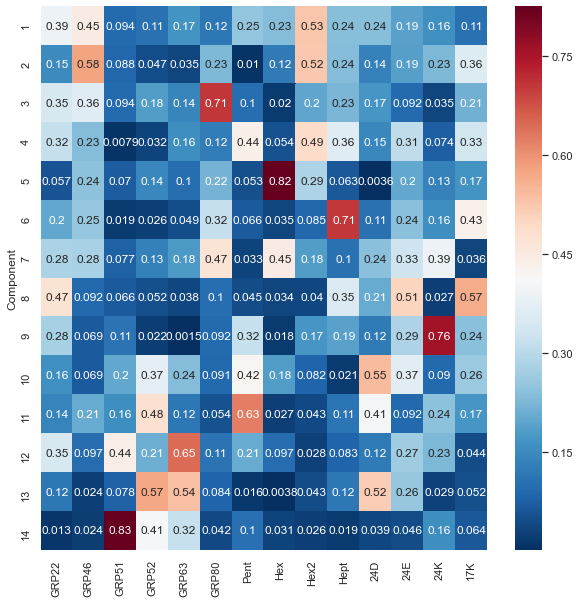

In [55]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [56]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [57]:
relative_pca_components

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80  \
Component                                                               
1          0.119491  0.150325  0.040468  0.038351  0.061953  0.042170   
2          0.046352  0.194180  0.037638  0.016702  0.012705  0.083567   
3          0.105666  0.121909  0.040317  0.065842  0.051850  0.257033   
4          0.096867  0.078317  0.003412  0.011293  0.057699  0.045073   
5          0.017275  0.081966  0.030216  0.051666  0.036699  0.079166   
6          0.060863  0.084788  0.008006  0.009377  0.018023  0.114629   
7          0.086980  0.094116  0.033133  0.047388  0.064562  0.170211   
8          0.144803  0.030644  0.028470  0.018659  0.013771  0.036266   
9          0.084625  0.023052  0.047498  0.007781  0.000547  0.033569   
10         0.049515  0.022994  0.085541  0.133204  0.086507  0.033106   
11         0.042744  0.069284  0.067141  0.171270  0.042737  0.019475   
12         0.105655  0.032333  0.189655  0.076372  0.237999  0.039923   
13         0.035236  0.008103  0.033392  0.205628  0.197542  0.030542   
14         0.003927  0.007988  0.355114  0.146467  0.117404  0.015270   

               Pent       Hex      Hex2      Hept       24D       24E  \
Component                                                               
1          0.093409  0.110125  0.193414  0.083879  0.079336  0.056822   
2          0.003741  0.056762  0.191876  0.083124  0.045395  0.055895   
3          0.037445  0.009457  0.071657  0.079597  0.056934  0.027234   
4          0.163173  0.025510  0.180748  0.128306  0.048434  0.091713   
5          0.019688  0.386423  0.105206  0.022269  0.001189  0.059411   
6          0.024590  0.016637  0.031284  0.249735  0.035514  0.071520   
7          0.012270  0.210428  0.066788  0.037136  0.080435  0.097806   
8          0.016705  0.015874  0.014671  0.123651  0.068462  0.150264   
9          0.118094  0.008468  0.062599  0.067376  0.040979  0.084895   
10         0.157238  0.085769  0.030070  0.007294  0.181934  0.108560   
11         0.232516  0.012723  0.015738  0.040240  0.135126  0.027196   
12         0.076433  0.045512  0.010377  0.029381  0.040281  0.079131   
13         0.005843  0.001785  0.015928  0.041365  0.173018  0.075811   
14         0.038855  0.014527  0.009644  0.006648  0.012964  0.013743   

                24K       17K  
Component                      
1          0.059050  0.034725  
2          0.083827  0.116704  
3          0.012806  0.070480  
4          0.027422  0.109374  
5          0.049444  0.054821  
6          0.057945  0.142033  
7          0.143509  0.011956  
8          0.009977  0.186272  
9          0.279795  0.079154  
10         0.033120  0.085775  
11         0.089997  0.056242  
12         0.084049  0.014372  
13         0.010618  0.017093  
14         0.058443  0.020998

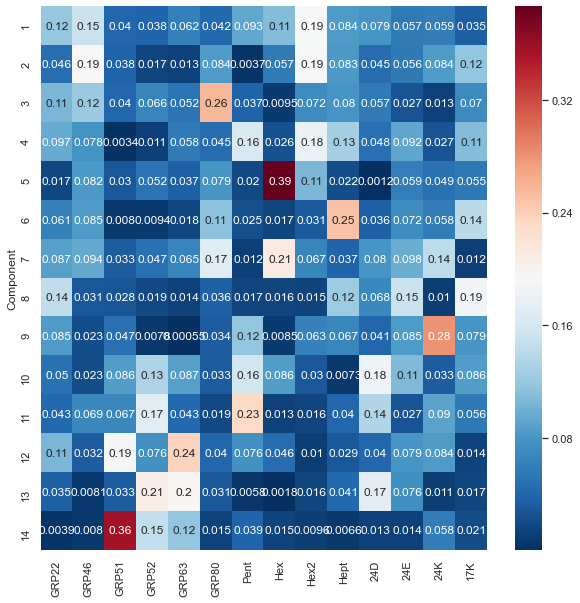

In [58]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

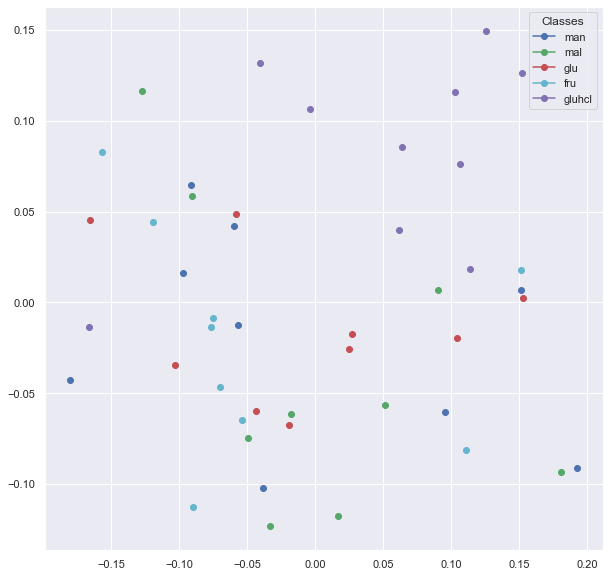

In [59]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['man', 'mal', 'glu', 'fru', 'gluhcl'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

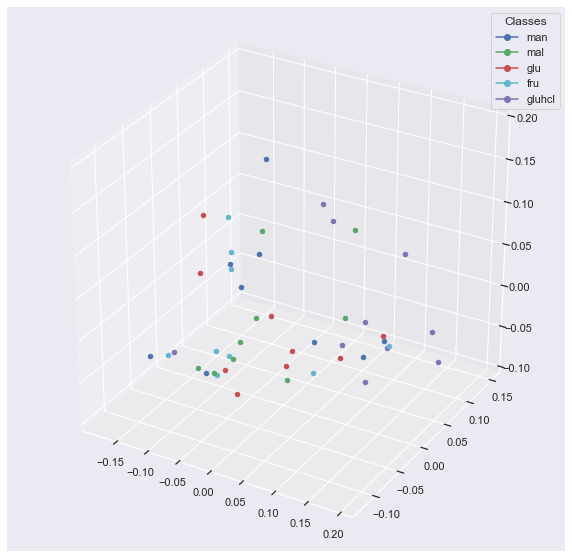

In [60]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['man', 'mal', 'glu', 'fru', 'gluhcl'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

For comparison with the large array, will retain all 14 features (without performing PCA, to enable fair comparison with the larger array)

In [61]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [62]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
random_forest = RandomForestClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.1}
Best score: 0.3214285714285714






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.1}
Best score: 0.3214285714285714
All parameter combinations tested:
1 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100000.0} nan
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 100000.0} 0.275
3 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegress

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 8192.0}
Best score: 0.3571428571428571






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 8192.0}
Best score: 0.3571428571428571
All parameter combinations tested:
1 {'LinearSVC__C': 4.0} 0.279
2 {'LinearSVC__C': 512.0} 0.332
3 {'LinearSVC__C': 8192.0} 0.357
4 {'LinearSVC__C': 2048.0} 0.357
5 {'LinearSVC__C': 256.0} 0.307
6 {'LinearSVC__C': 0.125} 0.196
7 {'LinearSVC__C': 0.1767766952966369} 0.171
8 {'LinearSVC__C': 8.0} 0.304
9 {'LinearSVC__C': 0.3535533905932738} 0.2
10 {'LinearSVC__C': 1.0} 0.229
11 {'LinearSVC__C': 362.03867196751236} 0.307
12 {'LinearSVC__C': 45.254833995939045} 0.332
13 {'LinearSVC__C': 0.5} 0.229
14 {'LinearSVC__C': 4096.0} 0.357
15 {'LinearSVC__C': 23170.47500592079} 0.357
16 {'LinearSVC__C': 0.04419417382415922} 0.25
17 {'LinearSVC__C': 16384.0} 0.357
18 {'LinearSVC__C': 90.50966799187809} 0.332
19 {'LinearSVC__C': 128.0} 0.332
20 {'LinearSVC__C': 11.313708498984761

In [63]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'newton-cg', 'L...             0.321429   
1  {'KNeighborsClassifier__weights': 'uniform', '...             0.360714   
2                                                 {}             0.382143   
3                           {'LinearSVC__C': 8192.0}             0.357143   
4  {'SVC__gamma': 0.125, 'SVC__C': 90.50966799187...             0.414286   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.248438                0.087487  
1             0.297321                0.124957  
2             0.382143                0.193517  
3             0.300571                0.152675  
4             0.219714                0.090356

For best comparison with large array, will pick LinearSVC. The above spot check confirms that it does a reasonable job (and isn't hugely worse than the other algorithms tested).

So, run hyperparameter optimisation for LinearSVC.

In [74]:
fixed_params = ml.define_fixed_model_params(clf=LinearSVC())
random_tuned_params = ml.define_tuned_model_params(clf=LinearSVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 362.03867196751236}
Best score: 0.3


In [76]:
grid_tuned_params = {'C': np.linspace(0.1, 500, 5000)}

svc_grid_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'LinearSVC__C': 9.6}
Best score: 0.24285714285714288


### So, optimal hyperparameter combination:
- C = 9.6

Model cross-validation score: [0.125      0.375      0.14285714 0.28571429 0.14285714]
accuracy_score: 0.3333333333333333
recall_score: 0.3
precision_score: 0.3
f1_score: 0.3
cohen_kappa_score: 0.19402985074626866
None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


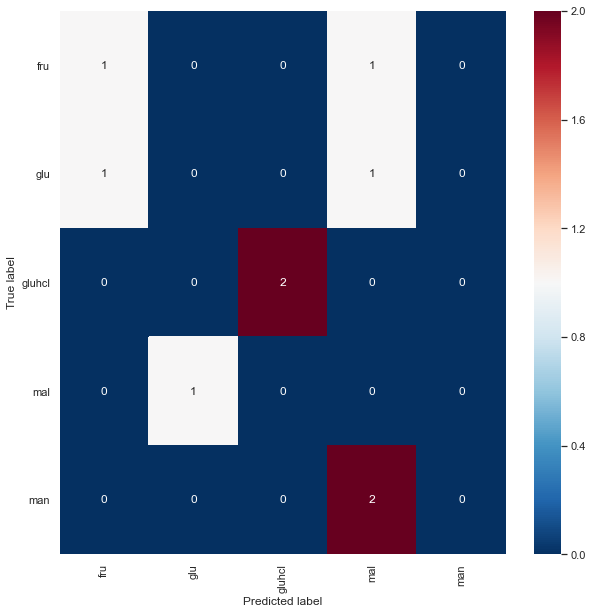

true


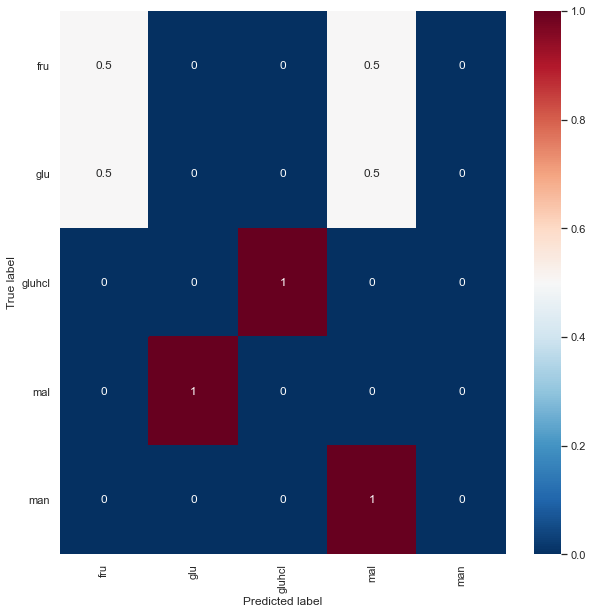

pred


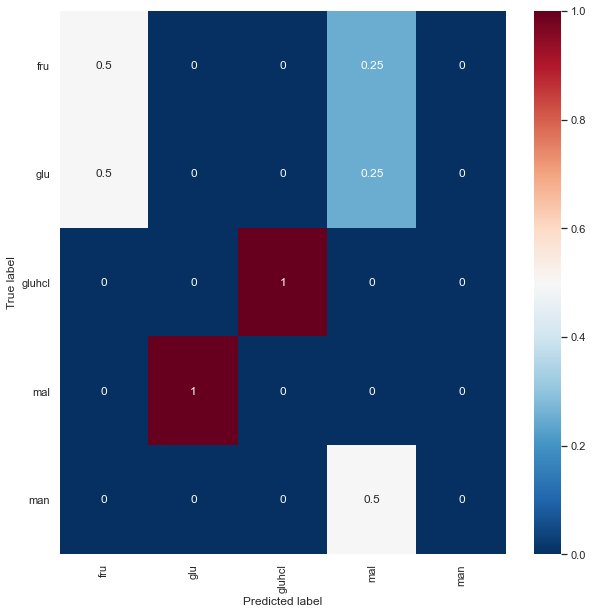

In [77]:
final_params = {'C': 9.6}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

So, the larger array performs slightly better than the standard array. However, the size of the test set is so small that the difference in performance could solely be down to random chance - need more data to distinguish these options. Comparison of the spot check scores for the two arrays indicates that they perform very similarly.

How well does the trained classifier predict the different classes?

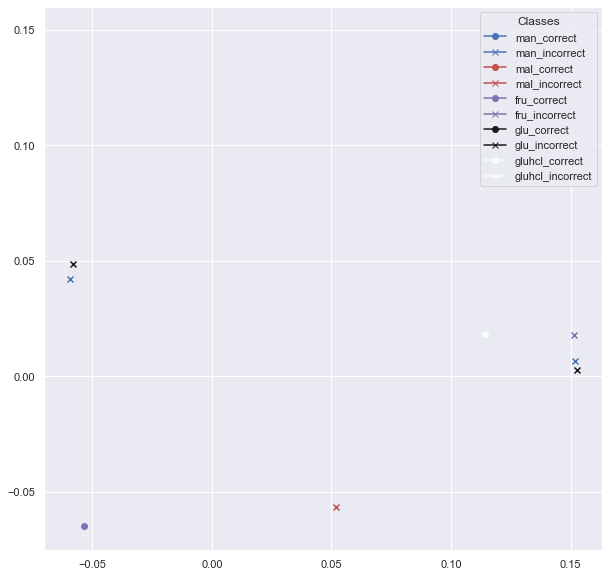

In [80]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=3,
    categories=['man_correct', 'man_incorrect', 'mal_correct', 'mal_incorrect', 'fru_correct', 'fru_incorrect',
                'glu_correct', 'glu_incorrect', 'gluhcl_correct', 'gluhcl_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)